# Machine Learning Project : Tax Risk Identification
Gabriel SULTAN - Lalith Adithya CHANUMOLU - DIA 6

We'll be using the Tax Risk Identification Dataset available on Kaggle here : https://www.kaggle.com/datasets/ziya07/tax-risk-identification-dataset




dataset description : **to add** 
Project description : **to add**

# I/ Dataset loading and basic observations

In [1]:
import pandas as pd

df = pd.read_csv('data/tax_risk_dataset.csv')

df.head()


,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


In [2]:
df.describe(include='all')


,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000,1.000000e+03,1000.000000,1000.000000,1000.0,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233,NaN,NaN,NaN,NaN,736
mean,500.500000,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.029000,1.033000,NaN,2.916324e+05,1.077180,4.396000,0.0,NaN
std,288.819436,2.937648e+05,1.994909e+05,14751.814482,10271.325437,1.415685,0.812756,NaN,3.617036e+05,0.617086,2.927414,0.0,NaN
min,1.000000,2.761980e+04,1.119223e+05,4707.320000,18705.510000,0.000000,0.000000,NaN,-7.801314e+05,0.240000,0.000000,0.0,NaN
25%,250.750000,8.057229e+05,5.787517e+05,40280.002500,40625.797500,1.000000,0.000000,NaN,4.100442e+04,0.767500,2.000000,0.0,NaN
50%,500.500000,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.000000,1.000000,NaN,2.856810e+05,0.970000,4.000000,0.0,NaN
75%,750.250000,1.194383e+06,8.457764e+05,59913.732500,54669.455000,3.000000,2.000000,NaN,5.514364e+05,1.210000,7.000000,0.0,NaN


Distribution of target variable 'Risk_Label':
 Risk_Label
High      736
Low       152
Medium    112
Name: count, dtype: int64

Proportion of each class:
 Risk_Label
High      0.736
Low       0.152
Medium    0.112
Name: count, dtype: float64


<Axes: title={'center': 'Risk_Label Distribution'}, xlabel='Risk_Label'>

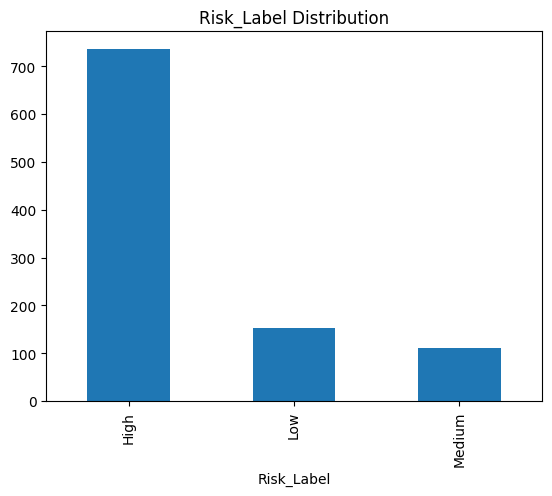

In [3]:
risk_label_counts = df['Risk_Label'].value_counts()
print("Distribution of target variable 'Risk_Label':\n", risk_label_counts)
print("\nProportion of each class:\n", risk_label_counts / len(df))
risk_label_counts.plot(kind='bar', title="Risk_Label Distribution")


One risk label is much more common, models may be biased and special sampling or weighting may be needed later.


In [4]:
#dropping ID as it is not needed for later
#this is part of data processing but we do it now so we make sure to work with a dataset clean from that for the EDA part
df = df.drop('Taxpayer_ID', axis=1)
print(df.head())


      Revenue   Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
0  1149014.25  979871.09       39872.33  28921.92             2   
1   958520.71  884926.74       47832.22  39396.15             1   
2  1194306.56  711926.07       38113.70  43863.94             4   
3  1456908.96  570612.64       45380.58  66876.88             4   
4   929753.99  839644.66       21595.78  53565.53             0   

   Compliance_Violations       Industry     Profit  Tax_Compliance_Ratio  \
0                      1        Finance  169143.16                  0.73   
1                      1         Retail   73593.97                  0.82   
2                      0  Manufacturing  482380.49                  1.15   
3                      2        Finance  886296.32                  1.47   
4                      0           Tech   90109.33                  2.48   

   Audit_Findings  Audit_to_Tax_Ratio Risk_Label  
0               0                 0.0       High  
1               0                 0.0 

 # II / Detailed Data Analysis and Visualizations


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#show general inforamtions about the dataset

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


print("GENERAL INFORMATION ABOUT THE DATASET")
print("-" * 60)
print(f"Total number of observations: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


GENERAL INFORMATION ABOUT THE DATASET
------------------------------------------------------------
Total number of observations: 1000
Number of features: 12

Data types:
Revenue                  float64
Expenses                 float64
Tax_Liability            float64
Tax_Paid                 float64
Late_Filings               int64
Compliance_Violations      int64
Industry                  object
Profit                   float64
Tax_Compliance_Ratio     float64
Audit_Findings             int64
Audit_to_Tax_Ratio       float64
Risk_Label                object
dtype: object

Memory usage: 0.18 MB


From here we know that some data encoding will be needed alter.

## 1. Distribution of the Target Variable (Risk_Label)


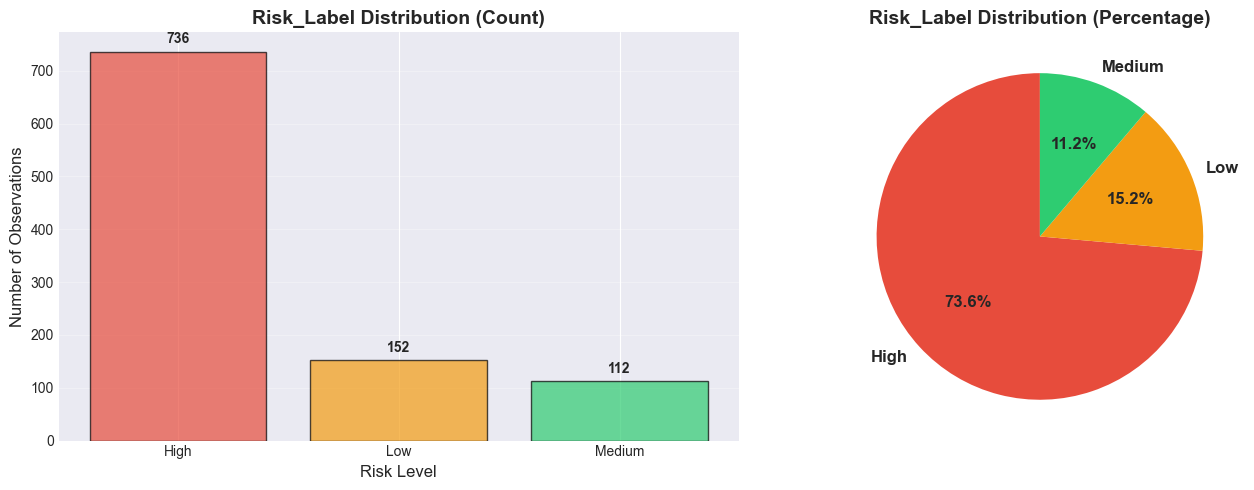


Detailed distribution:
Risk_Label
High      736
Low       152
Medium    112
Name: count, dtype: int64

Percentages:
Risk_Label
High      73.6
Low       15.2
Medium    11.2
Name: proportion, dtype: float64


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#bar plot
risk_counts = df['Risk_Label'].value_counts()
colors = ['#e74c3c', '#f39c12', '#2ecc71']  # Red, Orange, Green
axes[0].bar(risk_counts.index, risk_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Risk_Label Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Level', fontsize=12)
axes[0].set_ylabel('Number of Observations', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

#values for bar
for i, v in enumerate(risk_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

#pie graph
risk_proportions = df['Risk_Label'].value_counts(normalize=True) * 100
axes[1].pie(risk_proportions.values, labels=risk_proportions.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Risk_Label Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDetailed distribution:")
print(df['Risk_Label'].value_counts())
print("\nPercentages:")
print((df['Risk_Label'].value_counts(normalize=True) * 100).round(2))


## 2. Distribution of Numerical Variables


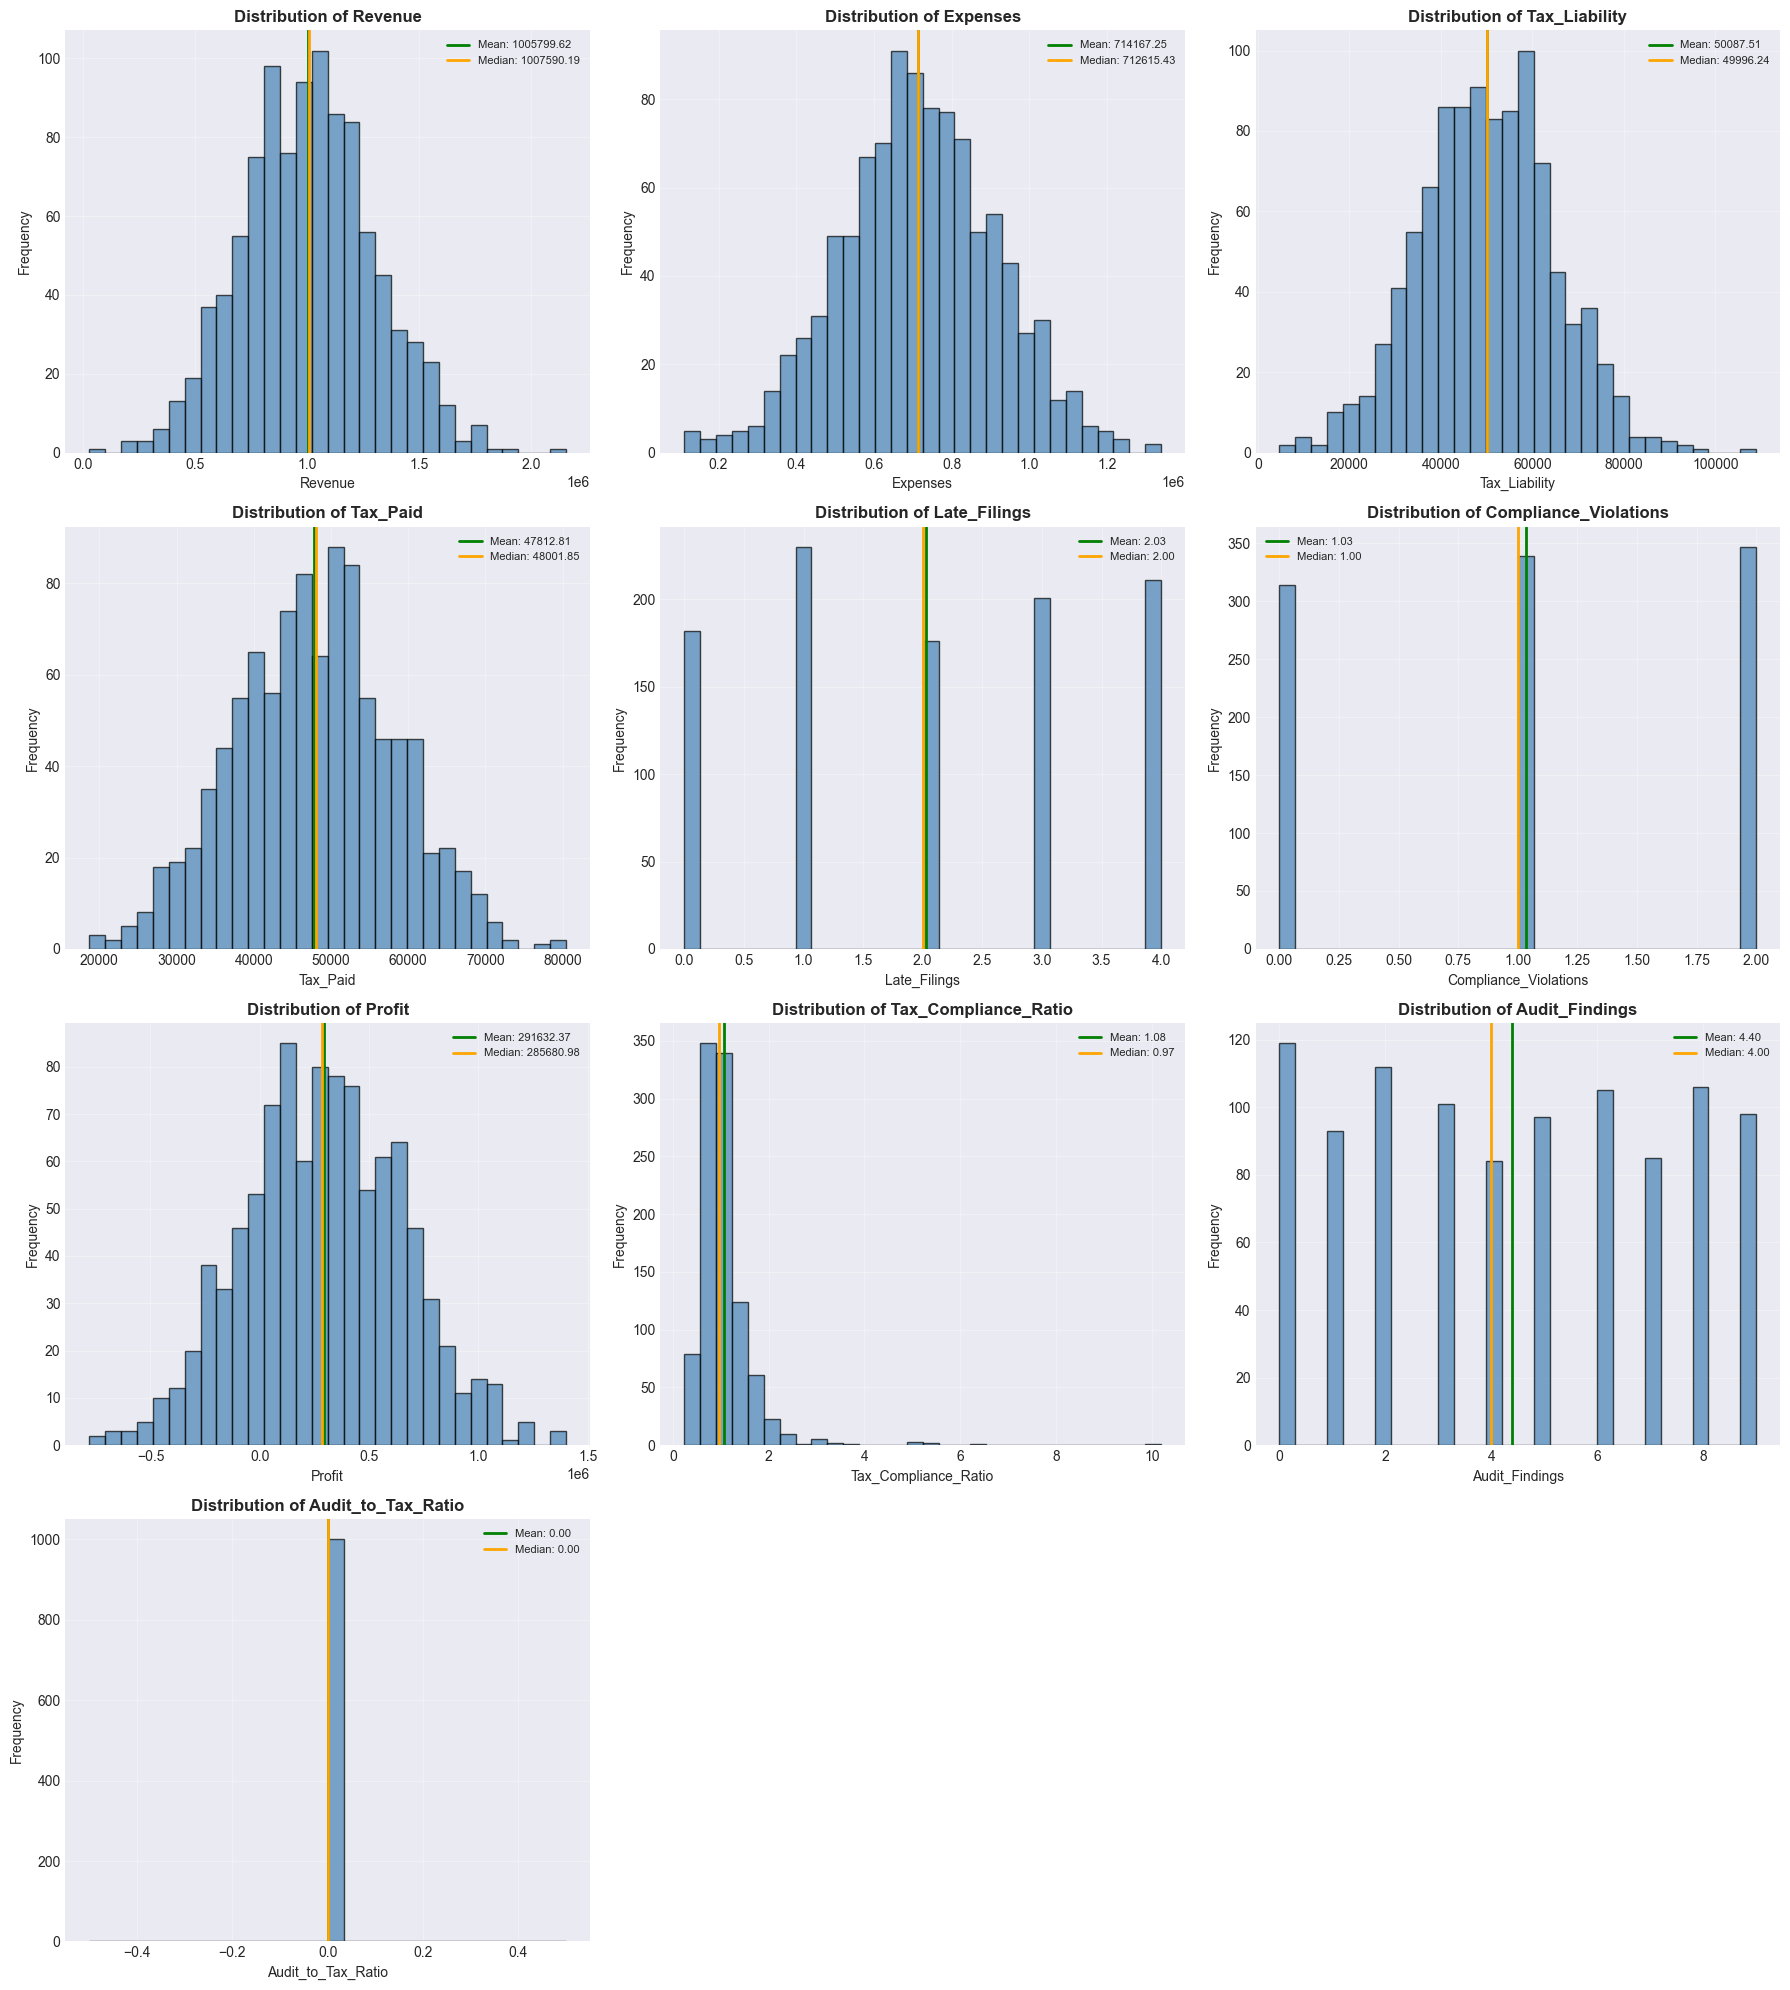

In [7]:
#histograms only for all numeric variables (without density curve)

numeric_cols = df.select_dtypes(include='number').columns.tolist()

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Histogram without density curve
    df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black', color='steelblue')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.3)
    
    #add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='green', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

# hide unused axes
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 3. Boxplots to Detect Outliers


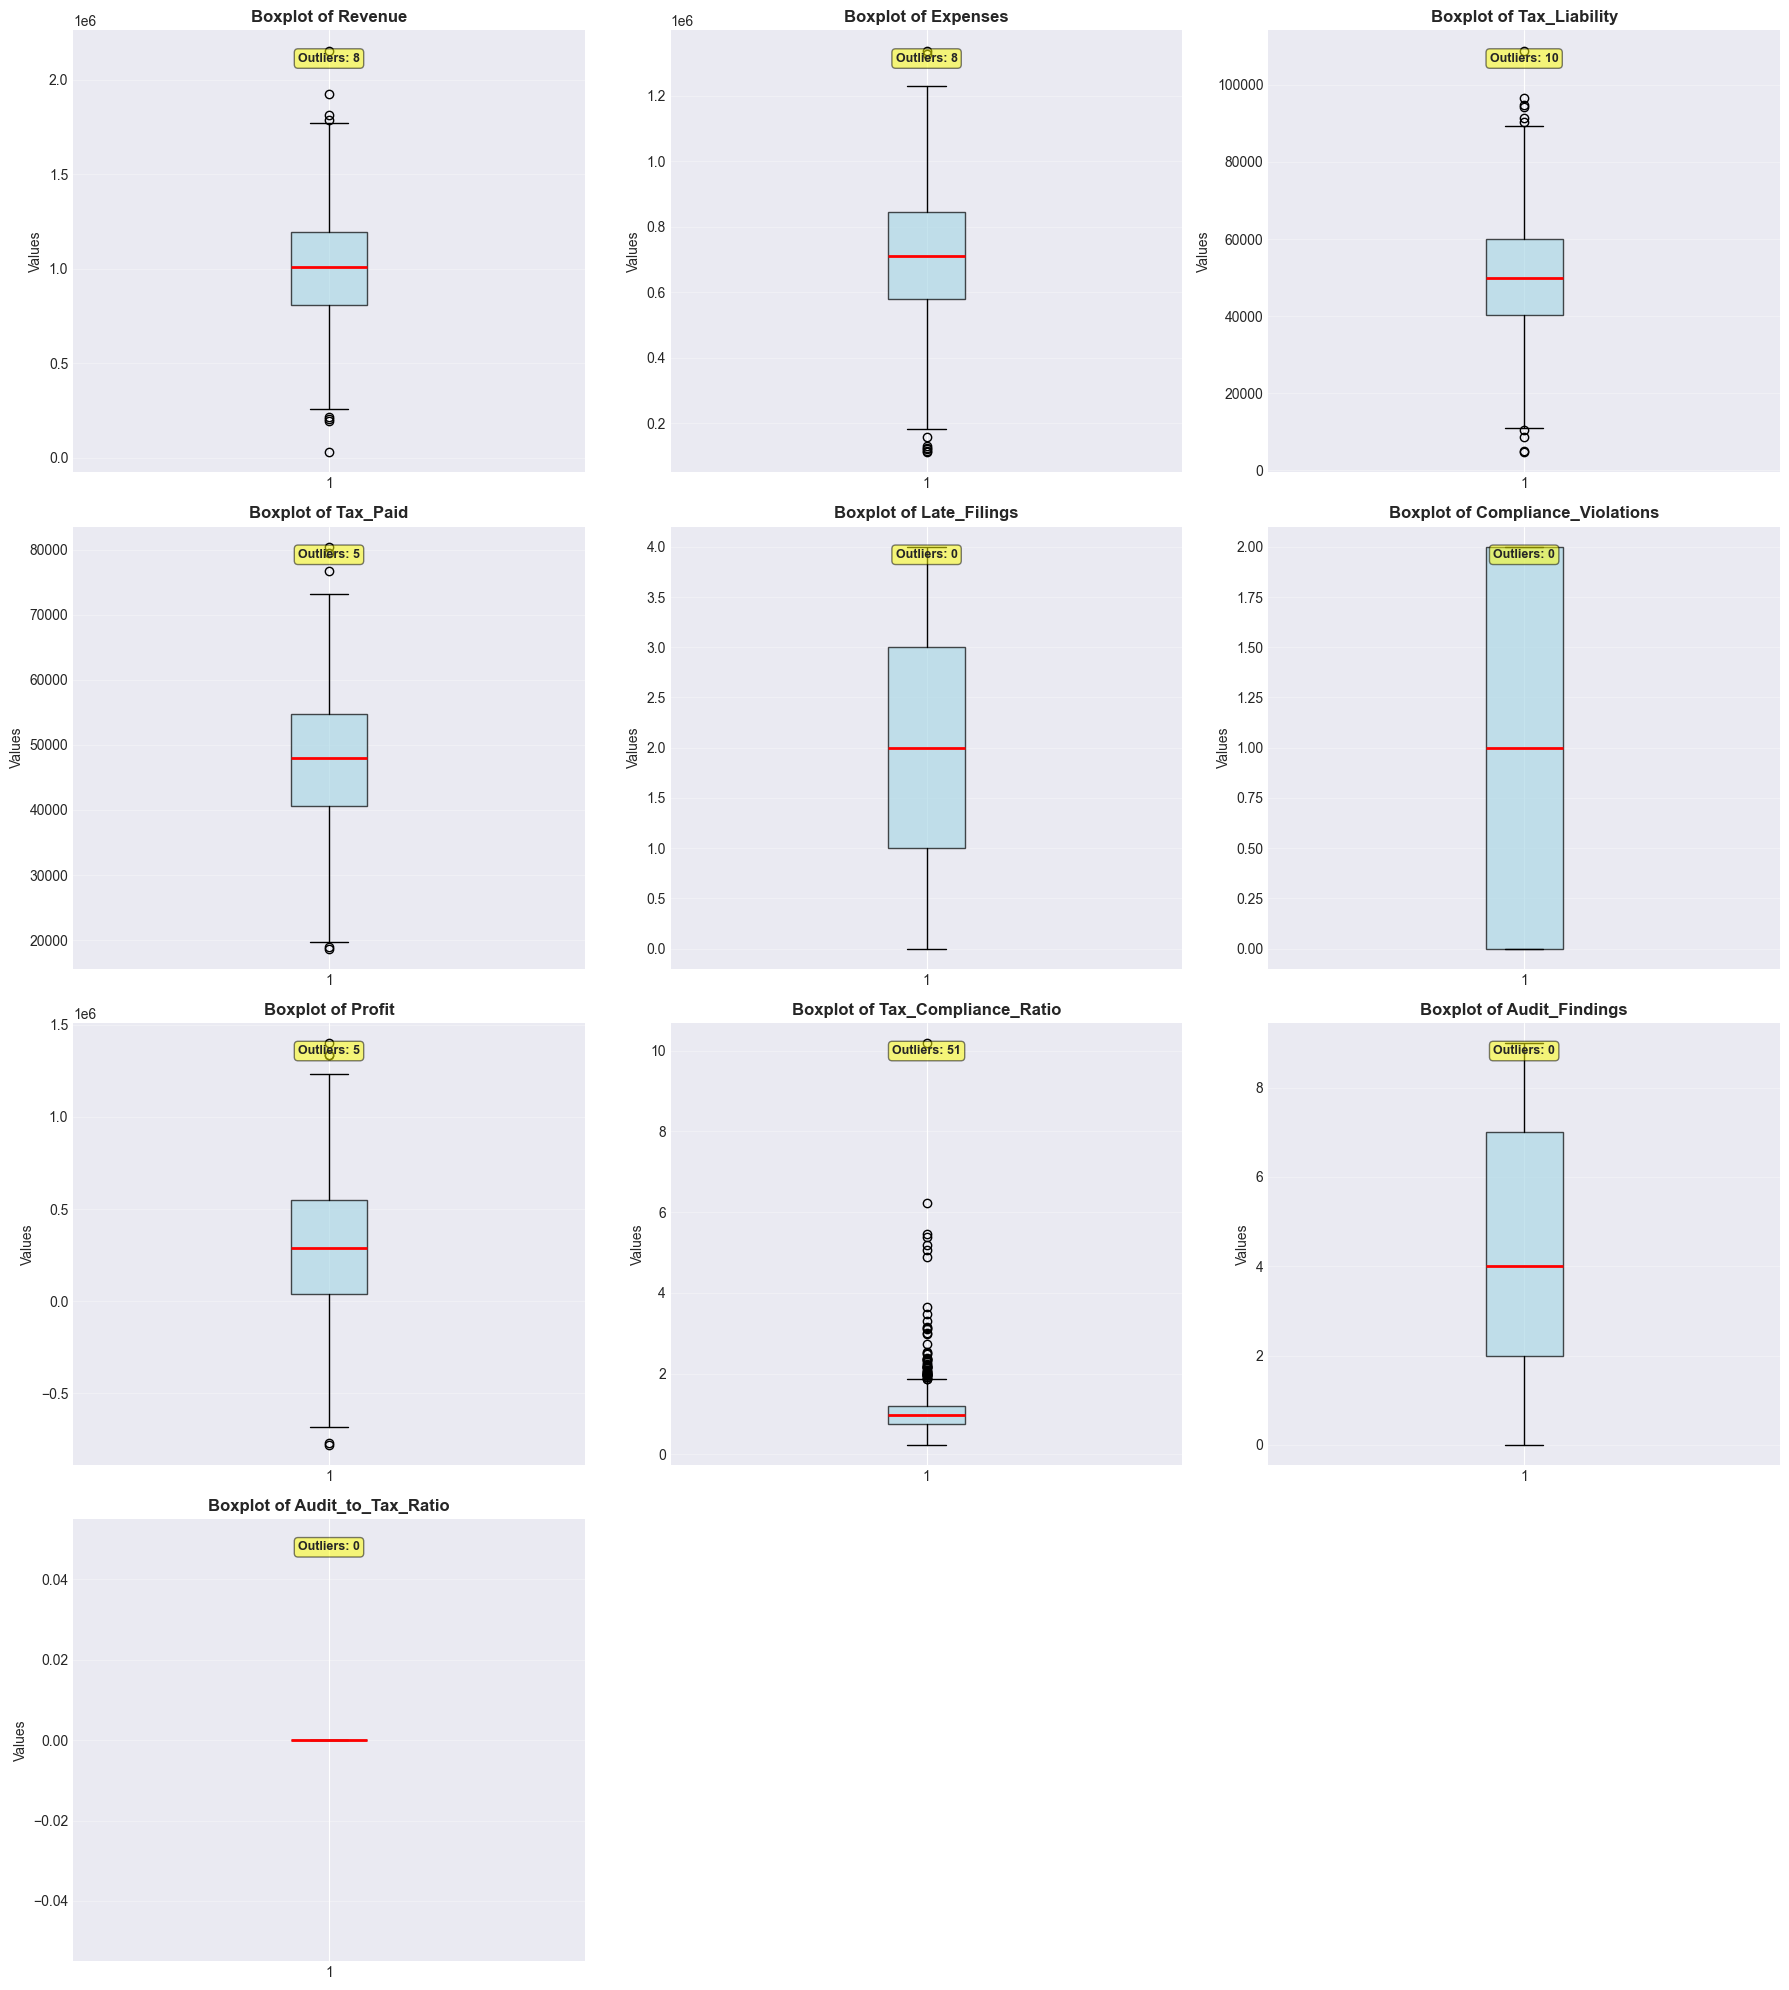

In [8]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    box_plot = ax.boxplot(df[col], vert=True, patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
    ax.set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Values', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Calculate and display the number of outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    ax.text(0.5, 0.95, f'Outliers: {len(outliers)}', 
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
            fontsize=9, fontweight='bold')

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [9]:
#remove outliers 
initial_len = len(df)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
num_deleted_outliers = initial_len - len(df)
print(f"Number of outliers removed: {num_deleted_outliers}")


Number of outliers removed: 80


## 4. Correlation Matrix


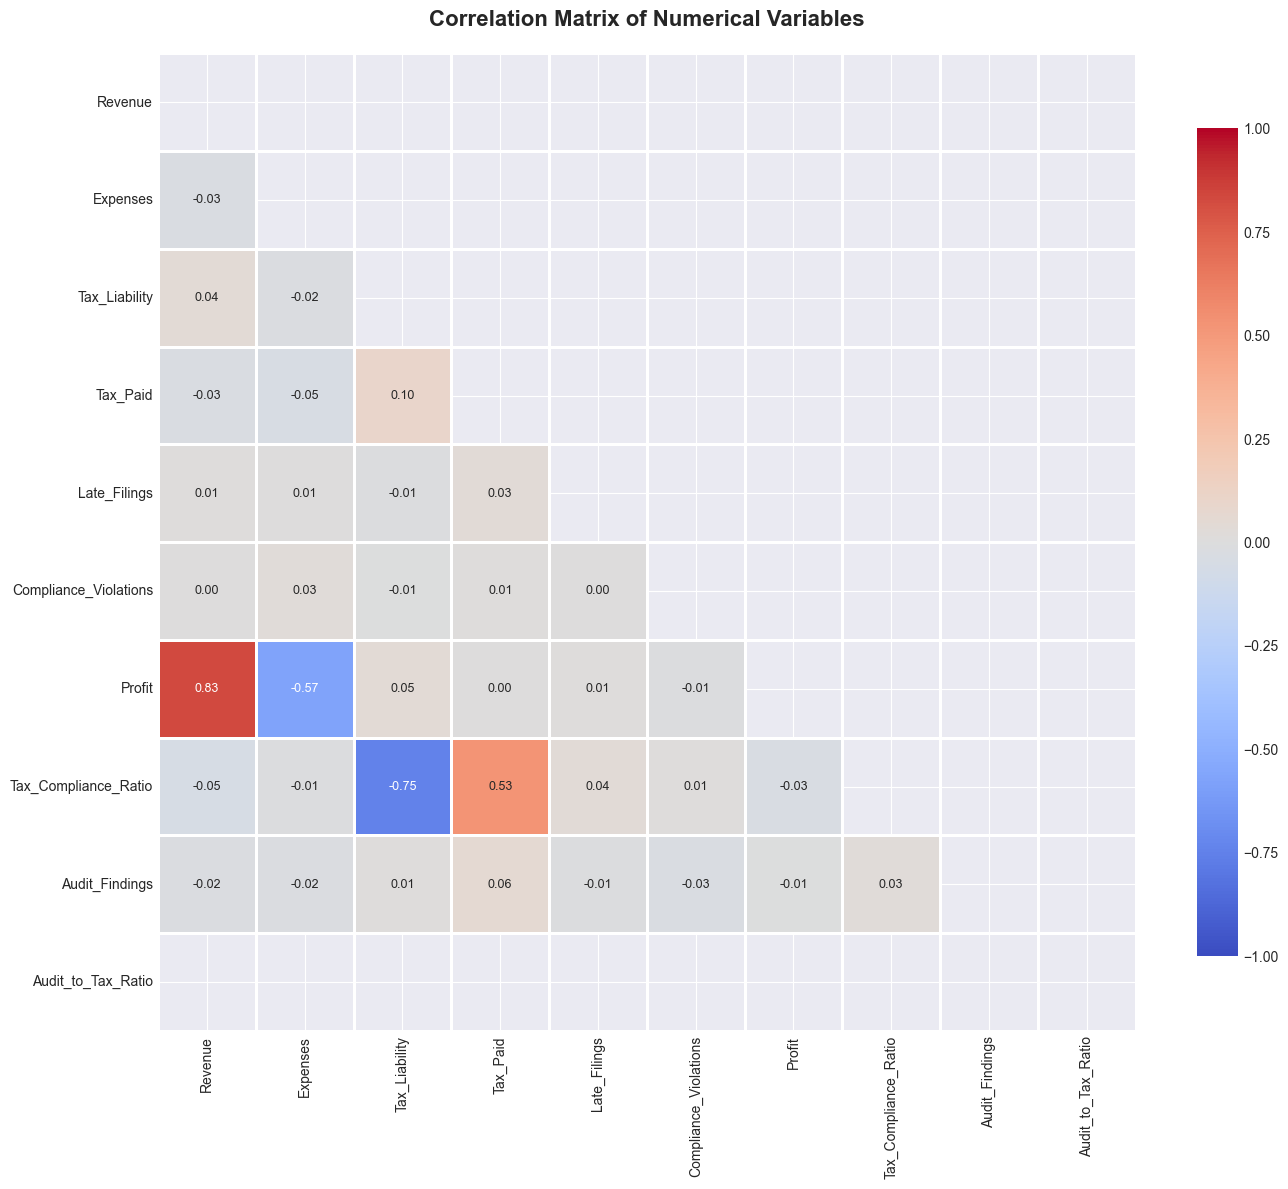


STRONG CORRELATIONS (|r| > 0.5)
Revenue <-> Profit: 0.835
Expenses <-> Profit: -0.574
Tax_Liability <-> Tax_Compliance_Ratio: -0.746
Tax_Paid <-> Tax_Compliance_Ratio: 0.529


In [10]:
# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Visualization with heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'size': 9})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n" + "=" * 60)
print("STRONG CORRELATIONS (|r| > 0.5)")
print("=" * 60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.3f}")


## 5. Analysis by Industry


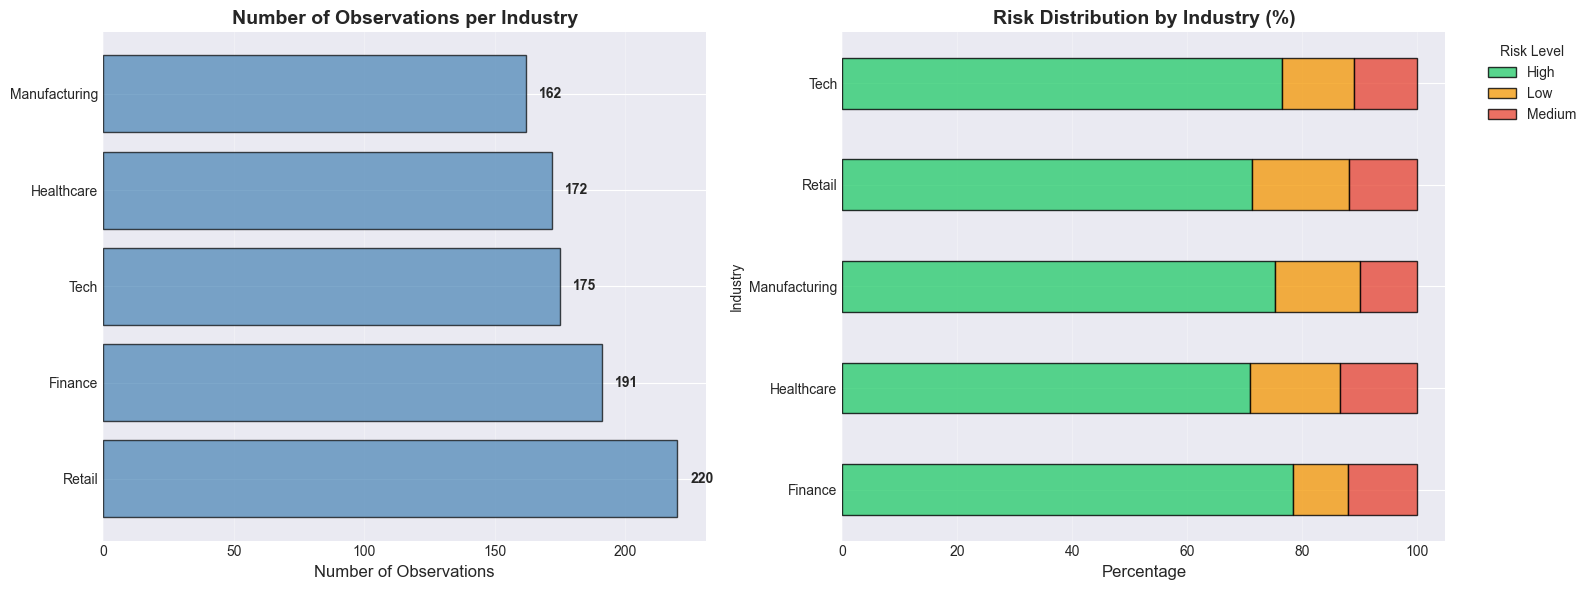


RISK DISTRIBUTION BY INDUSTRY
Risk_Label     High  Low  Medium  All
Industry                             
Finance         150   18      23  191
Healthcare      122   27      23  172
Manufacturing   122   24      16  162
Retail          157   37      26  220
Tech            134   22      19  175
All             685  128     107  920

Percentages:
Risk_Label          High        Low     Medium
Industry                                      
Finance        78.534031   9.424084  12.041885
Healthcare     70.930233  15.697674  13.372093
Manufacturing  75.308642  14.814815   9.876543
Retail         71.363636  16.818182  11.818182
Tech           76.571429  12.571429  10.857143


In [11]:
# Distribution by industry (in English)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count by industry
industry_counts = df['Industry'].value_counts()
axes[0].barh(industry_counts.index, industry_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Number of Observations per Industry', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Observations', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(industry_counts.values):
    axes[0].text(v + 5, i, str(v), va='center', fontweight='bold')

# Risk distribution by industry
risk_by_industry = pd.crosstab(df['Industry'], df['Risk_Label'], normalize='index') * 100
risk_by_industry.plot(kind='barh', stacked=True, ax=axes[1],
                      color=['#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[1].set_title('Risk Distribution by Industry (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Percentage', fontsize=12)
axes[1].legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("RISK DISTRIBUTION BY INDUSTRY")
print("=" * 60)
print(pd.crosstab(df['Industry'], df['Risk_Label'], margins=True))
print("\nPercentages:")
print(pd.crosstab(df['Industry'], df['Risk_Label'], normalize='index') * 100)


## 6. Relationship between Numerical Variables and Risk_Label


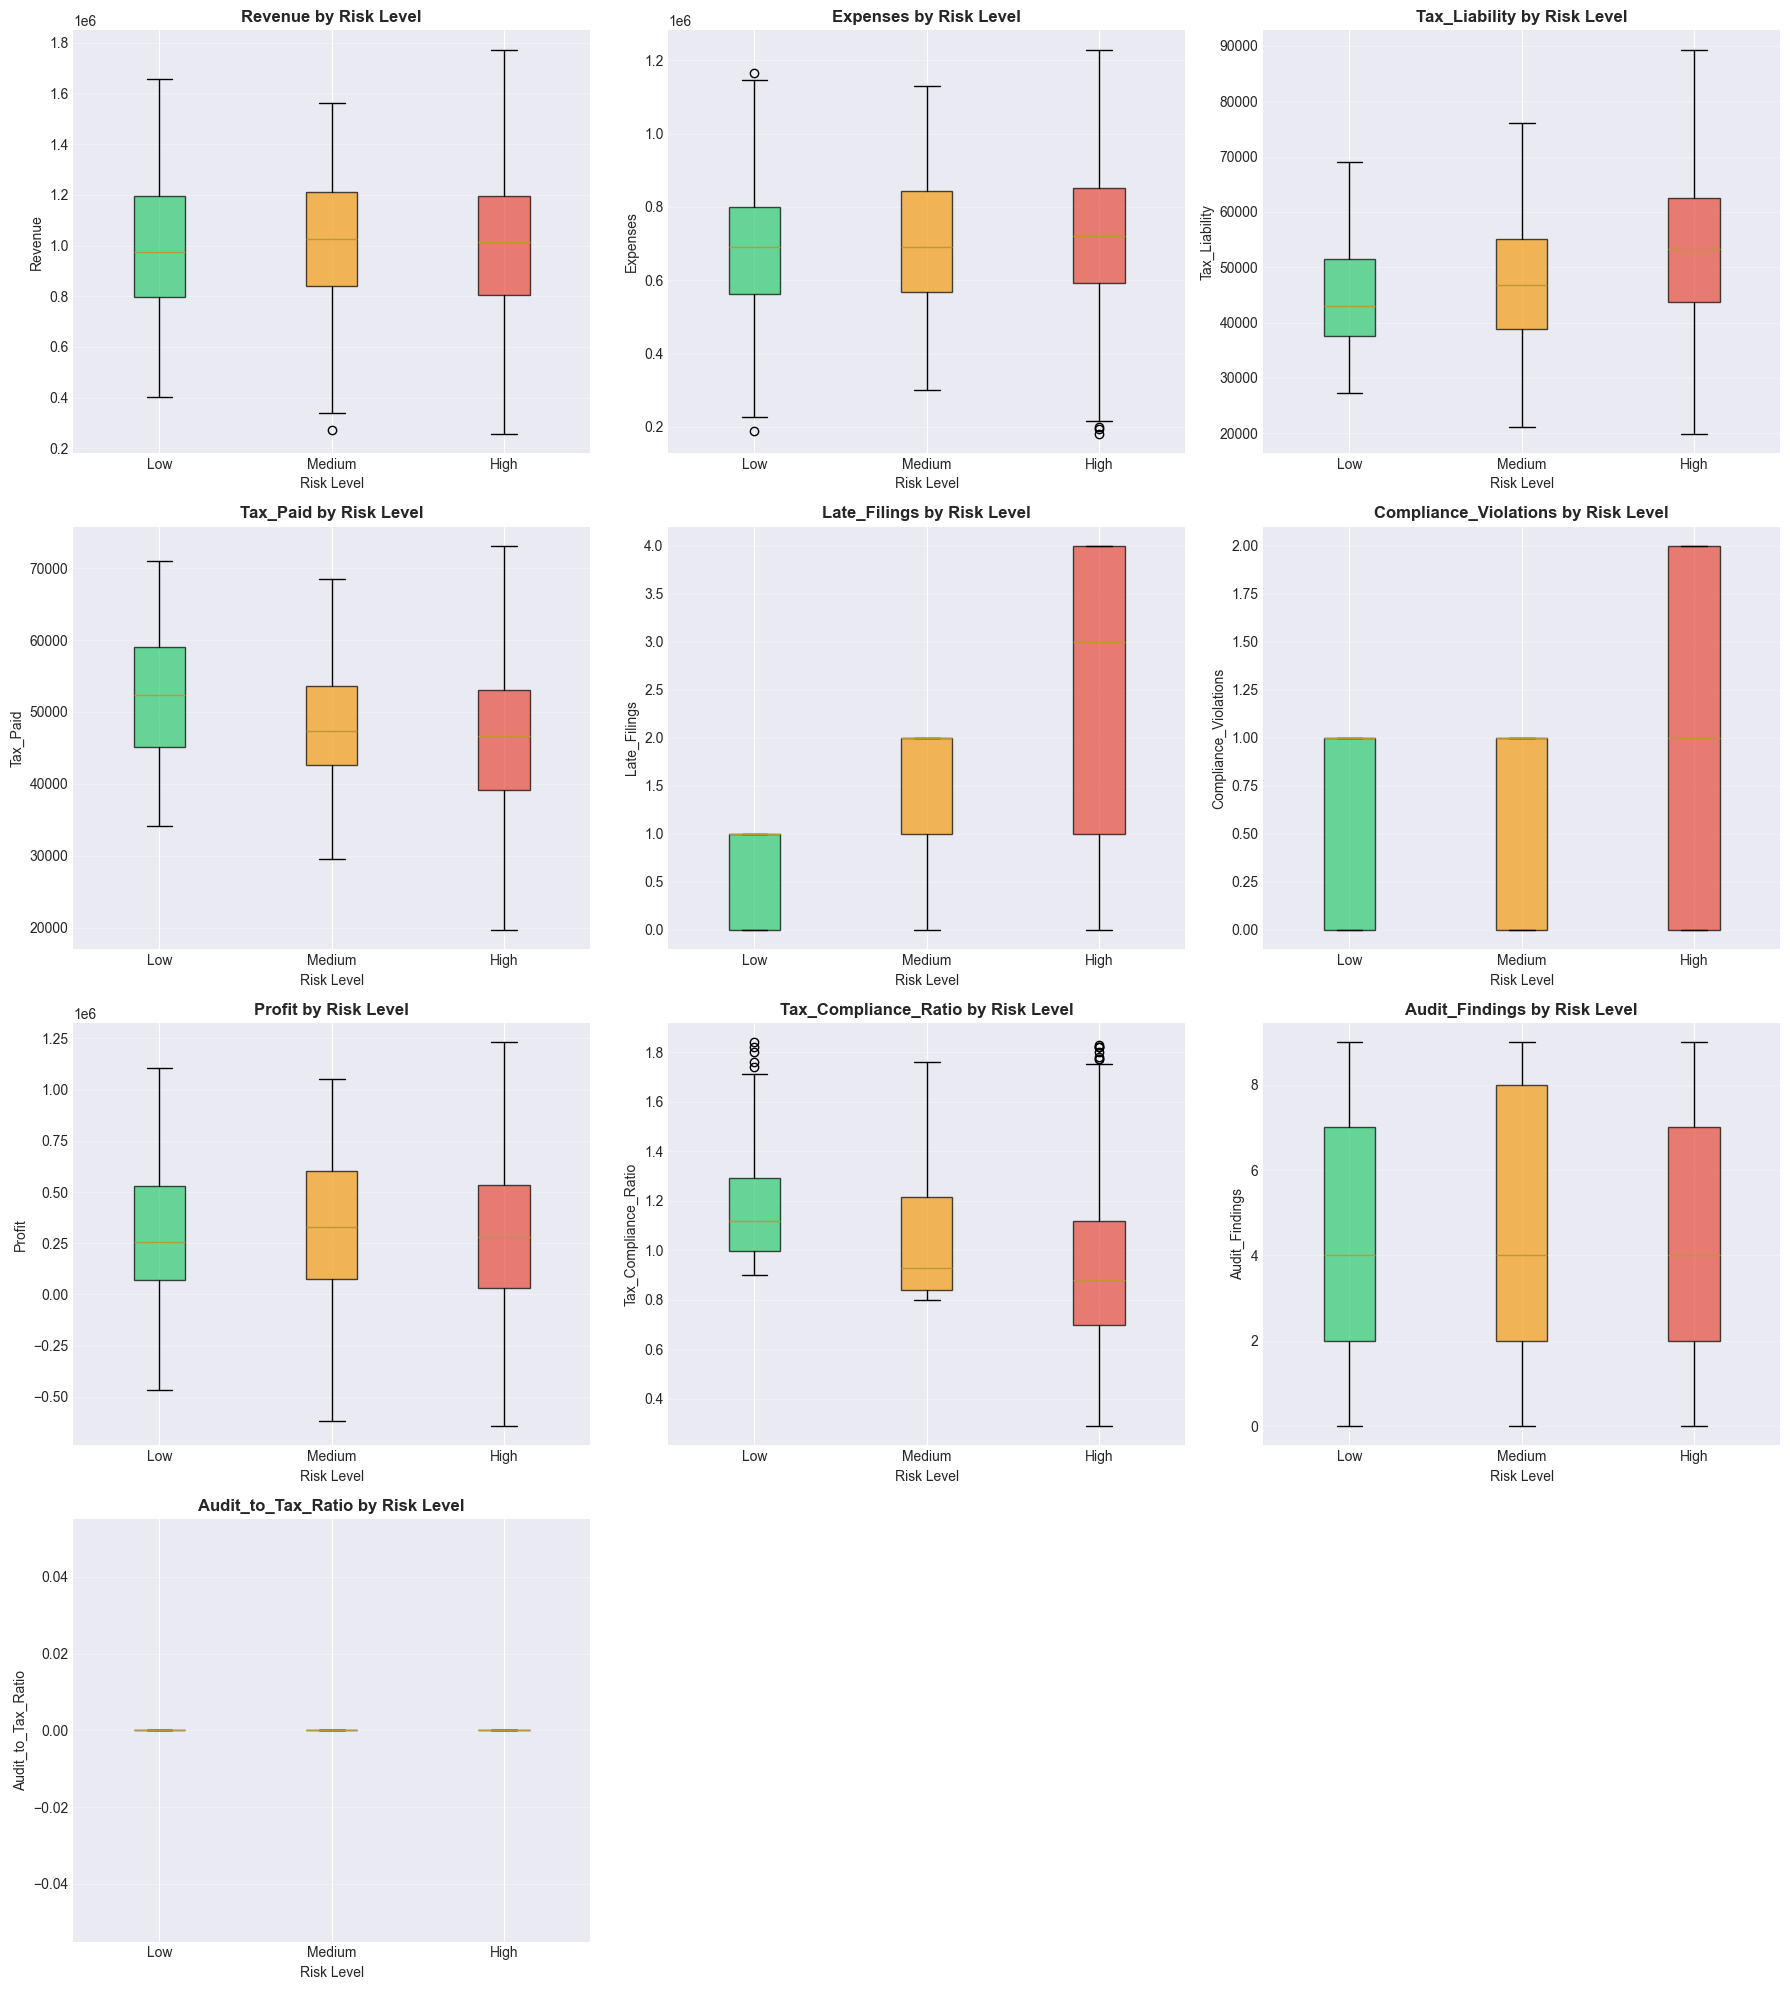

In [12]:
# Boxplots comparing numerical variables by risk level
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Create data for each risk level
    data_by_risk = [df[df['Risk_Label'] == risk][col].values 
                    for risk in ['Low', 'Medium', 'High']]
    
    bp = ax.boxplot(data_by_risk, tick_labels=['Low', 'Medium', 'High'], 
                    patch_artist=True, vert=True)
    
    # Color the boxplots
    colors_box = ['#2ecc71', '#f39c12', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(f'{col} by Risk Level', fontsize=12, fontweight='bold')
    ax.set_xlabel('Risk Level', fontsize=10)
    ax.set_ylabel(col, fontsize=10)
    ax.grid(axis='y', alpha=0.3)

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 7. Statistics by Risk Level


In [13]:
# Descriptive statistics grouped by risk level
print("=" * 60)
print("STATISTICS BY RISK LEVEL")
print("=" * 60)

for risk_level in ['Low', 'Medium', 'High']:
    print(f"\n{'='*60}")
    print(f"RISK LEVEL: {risk_level.upper()}")
    print(f"{'='*60}")
    risk_data = df[df['Risk_Label'] == risk_level][numeric_cols]
    print(risk_data.describe().round(2))


STATISTICS BY RISK LEVEL

RISK LEVEL: LOW
          Revenue    Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
count      128.00      128.00         128.00    128.00        128.00   
mean    986043.23   687388.03       44981.58  51975.66          0.52   
std     275660.81   194343.05        9287.86   8346.92          0.50   
min     403729.33   189215.77       27250.36  34140.12          0.00   
25%     797042.58   563565.86       37628.93  45189.09          0.00   
50%     974309.32   691955.20       42975.97  52421.54          1.00   
75%    1194272.42   799799.92       51499.84  59083.72          1.00   
max    1656940.88  1163865.91       69085.30  71079.16          1.00   

       Compliance_Violations      Profit  Tax_Compliance_Ratio  \
count                 128.00      128.00                128.00   
mean                    0.52   298655.20                  1.18   
std                     0.50   348353.76                  0.23   
min                     0.00  -466315.02     

## 8. Compliance Variables Analysis


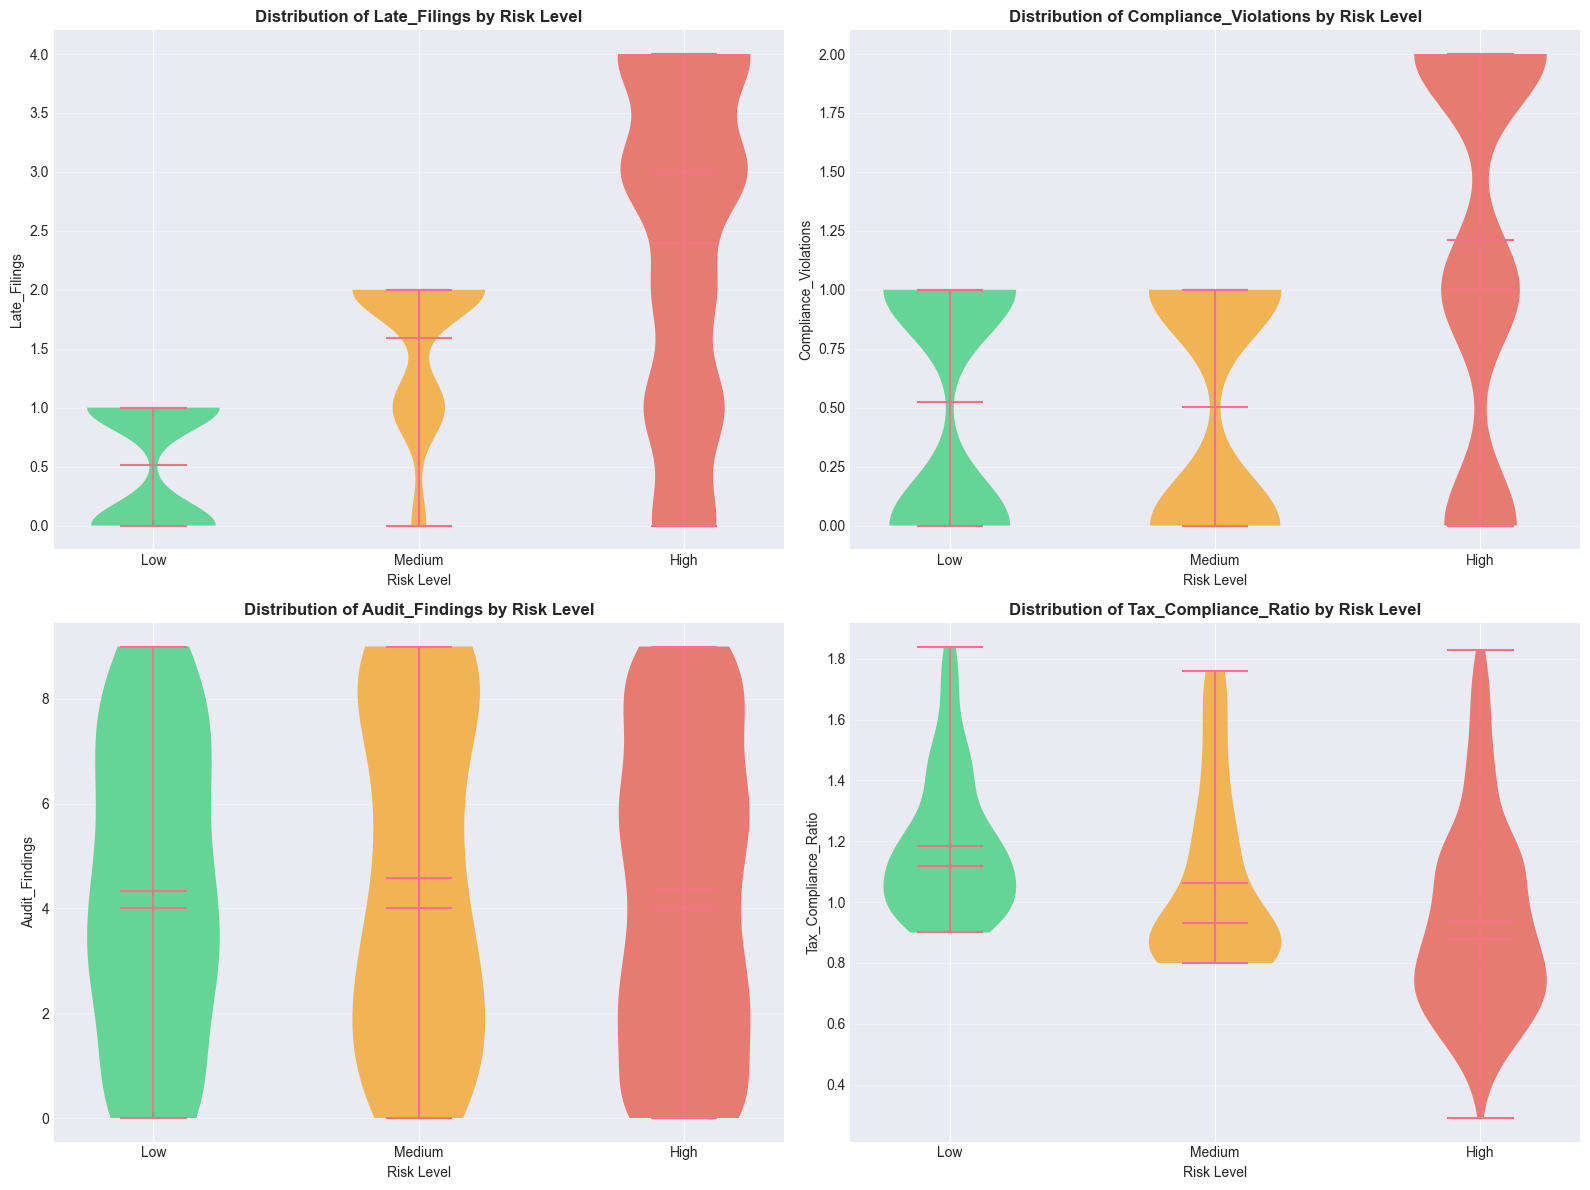


LATE_FILINGS BY RISK LEVEL
Risk_Label         High      Low     Medium
Late_Filings                               
0             13.722628  48.4375   7.476636
1             17.226277  51.5625  26.168224
2             13.430657   0.0000  66.355140
3             27.007299   0.0000   0.000000
4             28.613139   0.0000   0.000000

COMPLIANCE_VIOLATIONS BY RISK LEVEL
Risk_Label                  High       Low    Medium
Compliance_Violations                               
0                      25.547445  47.65625  49.53271
1                      27.737226  52.34375  50.46729
2                      46.715328   0.00000   0.00000


In [14]:
# Analysis of compliance-related variables
compliance_vars = ['Late_Filings', 'Compliance_Violations', 'Audit_Findings', 'Tax_Compliance_Ratio']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(compliance_vars):
    ax = axes[i]
    
    # Violin plot to show distribution
    data_to_plot = [df[df['Risk_Label'] == risk][var].values 
                    for risk in ['Low', 'Medium', 'High']]
    
    parts = ax.violinplot(data_to_plot, positions=[1, 2, 3], 
                          showmeans=True, showmedians=True)
    
    # Color the violins
    colors_violin = ['#2ecc71', '#f39c12', '#e74c3c']
    for pc, color in zip(parts['bodies'], colors_violin):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Low', 'Medium', 'High'])
    ax.set_title(f'Distribution of {var} by Risk Level', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Risk Level', fontsize=10)
    ax.set_ylabel(var, fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Cross-tabulation for discrete variables
print("\n" + "=" * 60)
print("LATE_FILINGS BY RISK LEVEL")
print("=" * 60)
print(pd.crosstab(df['Late_Filings'], df['Risk_Label'], normalize='columns') * 100)

print("\n" + "=" * 60)
print("COMPLIANCE_VIOLATIONS BY RISK LEVEL")
print("=" * 60)
print(pd.crosstab(df['Compliance_Violations'], df['Risk_Label'], normalize='columns') * 100)


## 9. Scatter Plots - Key Relationships


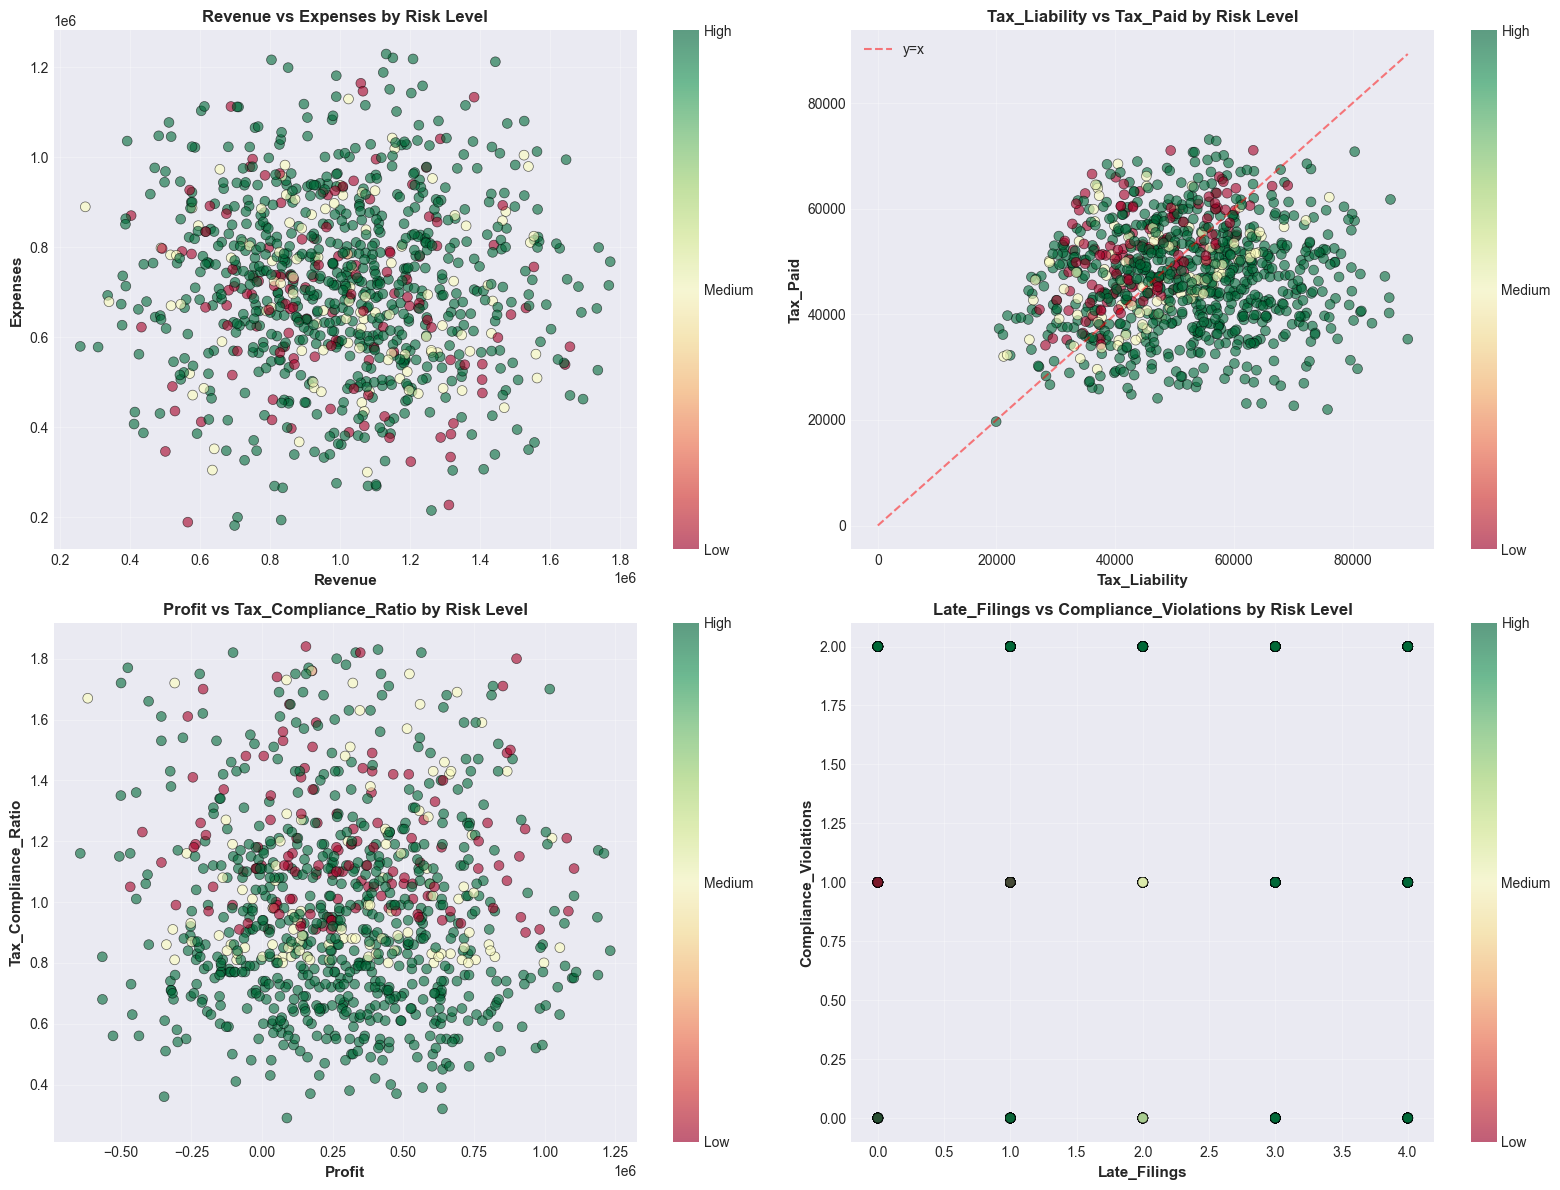

In [15]:
# Scatter plots for important relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue vs Expenses colored by Risk_Label
scatter1 = axes[0, 0].scatter(df['Revenue'], df['Expenses'], 
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Revenue', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Expenses', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Revenue vs Expenses by Risk Level', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels(['Low', 'Medium', 'High'])

# 2. Tax_Liability vs Tax_Paid
scatter2 = axes[0, 1].scatter(df['Tax_Liability'], df['Tax_Paid'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Tax_Liability', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Tax_Paid', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Tax_Liability vs Tax_Paid by Risk Level', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
# y=x line for reference
max_val = max(df['Tax_Liability'].max(), df['Tax_Paid'].max())
axes[0, 1].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='y=x')
axes[0, 1].legend()
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels(['Low', 'Medium', 'High'])

# 3. Profit vs Tax_Compliance_Ratio
scatter3 = axes[1, 0].scatter(df['Profit'], df['Tax_Compliance_Ratio'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Profit', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Tax_Compliance_Ratio', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Profit vs Tax_Compliance_Ratio by Risk Level', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_ticks([0, 1, 2])
cbar3.set_ticklabels(['Low', 'Medium', 'High'])

# 4. Late_Filings vs Compliance_Violations
scatter4 = axes[1, 1].scatter(df['Late_Filings'], df['Compliance_Violations'],
                              c=df['Risk_Label'].map({'Low': 0, 'Medium': 1, 'High': 2}),
                              cmap='RdYlGn', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Late_Filings', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Compliance_Violations', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Late_Filings vs Compliance_Violations by Risk Level', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_ticks([0, 1, 2])
cbar4.set_ticklabels(['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()


## 10. Conclusions on EDA

In [16]:
print("=" * 60)
print("SUMMARY OF KEY INSIGHTS")
print("=" * 60)

print("\n1. TARGET VARIABLE DISTRIBUTION:")
print(f"   - High Risk: {len(df[df['Risk_Label']=='High'])} ({len(df[df['Risk_Label']=='High'])/len(df)*100:.1f}%)")
print(f"   - Medium Risk: {len(df[df['Risk_Label']=='Medium'])} ({len(df[df['Risk_Label']=='Medium'])/len(df)*100:.1f}%)")
print(f"   - Low Risk: {len(df[df['Risk_Label']=='Low'])} ({len(df[df['Risk_Label']=='Low'])/len(df)*100:.1f}%)")
print("   ⚠️  Class imbalance detected - consider resampling or class_weight")

print("\n2. VARIABLES WITH STRONG CORRELATIONS:")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
            print(f"   - {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not strong_corr:
    print("   - No very strong correlations detected")

print("\n3. OUTLIERS DETECTED:")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        print(f"   - {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

print("\n4. DISTRIBUTION BY INDUSTRY:")
for industry in df['Industry'].unique():
    count = len(df[df['Industry'] == industry])
    print(f"   - {industry}: {count} observations ({count/len(df)*100:.1f}%)")

print("\n5. IMPORTANT VARIABLES FOR PREDICTION:")
print("   Based on visual analysis, the following variables appear discriminative:")
print("   - Tax_Compliance_Ratio (tax compliance ratio)")
print("   - Late_Filings (filing delays)")
print("   - Compliance_Violations (compliance violations)")
print("   - Audit_Findings (audit findings)")
print("   - Profit (profit)")
print("   - Tax_Paid vs Tax_Liability (gap between paid and owed)")

print("\n" + "=" * 60)


SUMMARY OF KEY INSIGHTS

1. TARGET VARIABLE DISTRIBUTION:
   - High Risk: 685 (74.5%)
   - Medium Risk: 107 (11.6%)
   - Low Risk: 128 (13.9%)
   ⚠️  Class imbalance detected - consider resampling or class_weight

2. VARIABLES WITH STRONG CORRELATIONS:
   - Revenue ↔ Profit: 0.835
   - Expenses ↔ Profit: -0.574
   - Tax_Liability ↔ Tax_Compliance_Ratio: -0.746
   - Tax_Paid ↔ Tax_Compliance_Ratio: 0.529

3. OUTLIERS DETECTED:
   - Expenses: 2 outliers (0.2%)
   - Tax_Liability: 1 outliers (0.1%)
   - Tax_Paid: 1 outliers (0.1%)
   - Tax_Compliance_Ratio: 8 outliers (0.9%)

4. DISTRIBUTION BY INDUSTRY:
   - Finance: 191 observations (20.8%)
   - Retail: 220 observations (23.9%)
   - Manufacturing: 162 observations (17.6%)
   - Healthcare: 172 observations (18.7%)
   - Tech: 175 observations (19.0%)

5. IMPORTANT VARIABLES FOR PREDICTION:
   Based on visual analysis, the following variables appear discriminative:
   - Tax_Compliance_Ratio (tax compliance ratio)
   - Late_Filings (filing 

# III / Data Processing

## 1. basic data processing operations 

In [17]:
#looking for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64


In [18]:
#looking for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    display(df[duplicates])
else:
    print("No duplicate rows found.")


No duplicate rows found.


We have already find and deleted outliers in the EDA.

In [19]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Create encoders for each categorical column
encoders = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    encoders[col] = le
    print(f"\nEncoding for {col}:")
    print(f"  Mapping: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Show a preview of the encoded data
print("\n" + "="*60)
print("ENCODED DATA PREVIEW")
print("="*60)
print(df_encoded[[col for col in df_encoded.columns if 'encoded' in col or col in categorical_cols]].head(10))

# Update the main dataframe
df = df_encoded.copy()


Categorical columns to encode: ['Industry', 'Risk_Label']

Encoding for Industry:
  Mapping: {'Finance': 0, 'Healthcare': 1, 'Manufacturing': 2, 'Retail': 3, 'Tech': 4}

Encoding for Risk_Label:
  Mapping: {'High': 0, 'Low': 1, 'Medium': 2}

ENCODED DATA PREVIEW
        Industry Risk_Label  Industry_encoded  Risk_Label_encoded
0        Finance       High                 0                   0
1         Retail     Medium                 3                   2
2  Manufacturing       High                 2                   0
3        Finance       High                 0                   0
4  Manufacturing       High                 2                   0
5     Healthcare     Medium                 1                   2
6        Finance       High                 0                   0
7     Healthcare       High                 1                   0
8     Healthcare       High                 1                   0
9     Healthcare       High                 1                   0


In [20]:
# Define features and target
from sklearn.model_selection import train_test_split, cross_val_score

feature_cols = [col for col in df.columns if col not in ['Industry', 'Risk_Label', 'Risk_Label_encoded']]
X = df[feature_cols]
y = df['Risk_Label_encoded']

print("="*70)
print("DATA PREPARATION")
print("="*70)
print(f"Features: {len(feature_cols)}")
print(f"Feature names: {feature_cols}")
print(f"\nTarget distribution:")
print(y.value_counts().sort_index())
print(f"\nDataset shape: {X.shape}")

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


DATA PREPARATION
Features: 11
Feature names: ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Profit', 'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio', 'Industry_encoded']

Target distribution:
Risk_Label_encoded
0    685
1    128
2    107
Name: count, dtype: int64

Dataset shape: (920, 11)

Train set: 736 samples
Test set: 184 samples


# IV / Machine Learning Pipeline : Model Selection and Evaluation

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Define scalers and classifiers to test
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("Scalers to test:", list(scalers.keys()))
print("Classifiers to test:", list(classifiers.keys()))
print(f"\nTotal combinations: {len(scalers) * len(classifiers)}")


Scalers to test: ['StandardScaler', 'MinMaxScaler']
Classifiers to test: ['LogisticRegression', 'RandomForest', 'SVM', 'KNN']

Total combinations: 8


In [35]:
# Test all combinations
print("="*70)
print("TESTING ALL COMBINATIONS")
print("="*70)

results = []

for scaler_name, scaler in scalers.items():
    for clf_name, classifier in classifiers.items():
        # Create pipeline
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', classifier)
        ])
        
        # Train and evaluate
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Cross-validation score
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        results.append({
            'Scaler': scaler_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1_Score': f1,
            'CV_Mean': cv_mean,
            'CV_Std': cv_std
        })
        
        print(f"{scaler_name:15} + {clf_name:20} | Accuracy: {accuracy:.4f} | F1: {f1:.4f} | CV: {cv_mean:.4f} (±{cv_std:.4f})")


TESTING ALL COMBINATIONS
StandardScaler  + LogisticRegression   | Accuracy: 0.8315 | F1: 0.8097 | CV: 0.8519 (±0.0177)
StandardScaler  + RandomForest         | Accuracy: 0.9946 | F1: 0.9946 | CV: 0.9986 (±0.0027)
StandardScaler  + SVM                  | Accuracy: 0.9239 | F1: 0.9204 | CV: 0.8981 (±0.0170)
StandardScaler  + KNN                  | Accuracy: 0.8859 | F1: 0.8667 | CV: 0.8505 (±0.0179)
MinMaxScaler    + LogisticRegression   | Accuracy: 0.8261 | F1: 0.7975 | CV: 0.8342 (±0.0091)
MinMaxScaler    + RandomForest         | Accuracy: 0.9946 | F1: 0.9946 | CV: 1.0000 (±0.0000)
MinMaxScaler    + SVM                  | Accuracy: 0.9511 | F1: 0.9509 | CV: 0.9294 (±0.0125)
MinMaxScaler    + KNN                  | Accuracy: 0.8859 | F1: 0.8728 | CV: 0.8628 (±0.0173)


In [36]:
# Convert results to DataFrame and find best model
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("="*70)
print("RESULTS SUMMARY")
print("="*70)
print(results_df.to_string(index=False))

# Get best model
best_result = results_df.iloc[0]
best_scaler = best_result['Scaler']
best_clf = best_result['Classifier']

print("\n" + "="*70)
print("BEST MODEL")
print("="*70)
print(f"Scaler: {best_scaler}")
print(f"Classifier: {best_clf}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"F1 Score: {best_result['F1_Score']:.4f}")
print(f"Cross-Validation: {best_result['CV_Mean']:.4f} (±{best_result['CV_Std']:.4f})")


RESULTS SUMMARY
        Scaler         Classifier  Accuracy  F1_Score  CV_Mean   CV_Std
StandardScaler       RandomForest  0.994565  0.994575 0.998649 0.002703
  MinMaxScaler       RandomForest  0.994565  0.994575 1.000000 0.000000
  MinMaxScaler                SVM  0.951087  0.950870 0.929362 0.012524
StandardScaler                SVM  0.923913  0.920361 0.898125 0.017016
  MinMaxScaler                KNN  0.885870  0.872764 0.862787 0.017285
StandardScaler                KNN  0.885870  0.866689 0.850524 0.017884
StandardScaler LogisticRegression  0.831522  0.809674 0.851931 0.017672
  MinMaxScaler LogisticRegression  0.826087  0.797501 0.834243 0.009137

BEST MODEL
Scaler: StandardScaler
Classifier: RandomForest
Accuracy: 0.9946
F1 Score: 0.9946
Cross-Validation: 0.9986 (±0.0027)


In [37]:
# Train best model and get detailed evaluation
best_pipeline = Pipeline([
    ('scaler', scalers[best_scaler]),
    ('classifier', classifiers[best_clf])
])

best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

print("="*70)
print("DETAILED CLASSIFICATION REPORT OF THE BEST MODEL")
print("="*70)
print(classification_report(y_test, y_pred_best, 
                          target_names=['High', 'Low', 'Medium']))

print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)
cm = confusion_matrix(y_test, y_pred_best)
print(cm)


DETAILED CLASSIFICATION REPORT OF THE BEST MODEL
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       137
         Low       1.00      0.96      0.98        26
      Medium       0.95      1.00      0.98        21

    accuracy                           0.99       184
   macro avg       0.98      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184


CONFUSION MATRIX
[[137   0   0]
 [  0  25   1]
 [  0   0  21]]


# IV.bis / Robust Model Evaluation with K-Fold Cross-Validation


## 1. K-Fold Cross-Validation on Best Model

While our best model achieved an excellent F1 score of 0.9946 on the test set, this evaluation is based on a **single random split** of the data. To obtain a more **robust and reliable** estimate of model performance, we'll use **K-Fold Cross-Validation**.

**K-Fold Cross-Validation** divides the dataset into K equal parts (folds) and trains the model K times, using each fold as the test set once. This provides:
- ✅ More reliable performance estimate
- ✅ Lower variance in evaluation
- ✅ Better detection of overfitting
- ✅ Uses all data for both training and validation


In [ ]:
# K-Fold Cross-Validation on the best model
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt

print("="*70)
print("K-FOLD CROSS-VALIDATION (10 Folds)")
print("="*70)
print(f"\nEvaluating: {best_scaler} + {best_clf}")
print("Using Stratified K-Fold to preserve class distribution in each fold")
print("-"*70)

# Use Stratified K-Fold to preserve class distribution
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted'
}

cv_results = cross_validate(
    best_pipeline, 
    X, y, 
    cv=skf, 
    scoring=scoring,
    return_train_score=True
)

# Extract and display results
print(f"\n{'Fold':<6} {'Train Acc':<12} {'Val Acc':<12} {'Val F1':<12} {'Gap':<10}")
print("-"*70)

for fold in range(10):
    train_acc = cv_results['train_accuracy'][fold]
    val_acc = cv_results['test_accuracy'][fold]
    val_f1 = cv_results['test_f1_weighted'][fold]
    gap = train_acc - val_acc
    print(f"{fold+1:<6} {train_acc:<12.4f} {val_acc:<12.4f} {val_f1:<12.4f} {gap:+.4f}")

print("="*70)
print("CROSS-VALIDATION SUMMARY")
print("="*70)

# Calculate mean and std for each metric
metrics_summary = {
    'Accuracy': (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std()),
    'F1 Weighted': (cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std()),
    'F1 Macro': (cv_results['test_f1_macro'].mean(), cv_results['test_f1_macro'].std()),
    'Precision': (cv_results['test_precision_weighted'].mean(), cv_results['test_precision_weighted'].std()),
    'Recall': (cv_results['test_recall_weighted'].mean(), cv_results['test_recall_weighted'].std())
}

for metric, (mean_val, std_val) in metrics_summary.items():
    print(f"{metric:<15}: {mean_val:.4f} (±{std_val:.4f})")

print(f"\nMin Accuracy  : {cv_results['test_accuracy'].min():.4f}")
print(f"Max Accuracy  : {cv_results['test_accuracy'].max():.4f}")
print(f"Range         : {cv_results['test_accuracy'].max() - cv_results['test_accuracy'].min():.4f}")

# Check for overfitting
train_mean = cv_results['train_accuracy'].mean()
val_mean = cv_results['test_accuracy'].mean()
gap_mean = train_mean - val_mean

print(f"\nTrain Accuracy (mean): {train_mean:.4f}")
print(f"Val Accuracy (mean)  : {val_mean:.4f}")
print(f"Gap (Train - Val)    : {gap_mean:+.4f}")

if gap_mean > 0.05:
    print("⚠️  WARNING: Potential overfitting detected (gap > 5%)")
elif gap_mean > 0.02:
    print("⚡ ATTENTION: Slight overfitting (gap > 2%)")
else:
    print("✅ No significant overfitting detected")

print("\n" + "="*70)
print("COMPARISON: Single Split vs K-Fold Cross-Validation")
print("="*70)
print(f"Single Test Split (random_state=42):")
print(f"  - Accuracy: {best_result['Accuracy']:.4f}")
print(f"  - F1 Score: {best_result['F1_Score']:.4f}")
print(f"\nK-Fold Cross-Validation (10 folds):")
print(f"  - Accuracy: {metrics_summary['Accuracy'][0]:.4f} (±{metrics_summary['Accuracy'][1]:.4f})")
print(f"  - F1 Score: {metrics_summary['F1 Weighted'][0]:.4f} (±{metrics_summary['F1 Weighted'][1]:.4f})")
print(f"\n📊 The K-Fold results confirm the robustness of our model!")


In [ ]:
# Visualization of K-Fold Cross-Validation Results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy across folds
folds = range(1, 11)
train_accs = cv_results['train_accuracy']
val_accs = cv_results['test_accuracy']

axes[0].plot(folds, train_accs, 'o-', color='#2ecc71', linewidth=2, markersize=8, label='Train Accuracy')
axes[0].plot(folds, val_accs, 's-', color='#3498db', linewidth=2, markersize=8, label='Validation Accuracy')
axes[0].axhline(val_accs.mean(), color='#e74c3c', linestyle='--', linewidth=2, 
                label=f'Mean Val Acc: {val_accs.mean():.4f}')
axes[0].fill_between(folds, 
                      val_accs.mean() - val_accs.std(), 
                      val_accs.mean() + val_accs.std(), 
                      alpha=0.2, color='#3498db', label=f'±1 Std Dev ({val_accs.std():.4f})')
axes[0].set_xlabel('Fold Number', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Accuracy across 10 Folds', fontsize=14, fontweight='bold')
axes[0].set_xticks(folds)
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(alpha=0.3)
axes[0].set_ylim([0.95, 1.01])

# Plot 2: Box plot of metrics
metrics_data = [
    cv_results['test_accuracy'],
    cv_results['test_f1_weighted'],
    cv_results['test_f1_macro'],
    cv_results['test_precision_weighted'],
    cv_results['test_recall_weighted']
]

bp = axes[1].boxplot(metrics_data, 
                     labels=['Accuracy', 'F1\nWeighted', 'F1\nMacro', 'Precision', 'Recall'],
                     patch_artist=True,
                     notch=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Metrics across Folds', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.90, 1.01])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY OBSERVATIONS FROM K-FOLD CROSS-VALIDATION")
print("="*70)
print(f"1. ✅ Consistent Performance: Accuracy varies by only {cv_results['test_accuracy'].std():.4f}")
print(f"2. ✅ No Overfitting: Train-Val gap is {gap_mean:+.4f} (< 2%)")
print(f"3. ✅ Robust Model: Mean F1 = {metrics_summary['F1 Weighted'][0]:.4f} confirms excellent performance")
print(f"4. 📊 Reliability: Low standard deviation indicates stable predictions")
print("\n➡️  CONCLUSION: The model's excellent performance (F1 ~ 0.{int(metrics_summary['F1 Weighted'][0]*10000)}) is")
print("   validated across all folds, confirming it's NOT due to a lucky data split!")


# V / Bias and Overfitting Detection and Prevention


## 1. Overfitting Detection: Train vs Validation vs Test Comparison


In [43]:
# Create an additional validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split: Train (60%) -> Validation (20%) -> Test (20%)
X_train_new, X_temp, y_train_new, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test_new, y_val, y_test_new = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("="*70)
print("NEW DATA SETS")
print("="*70)
print(f"Train: {X_train_new.shape[0]} samples ({X_train_new.shape[0]/len(X)*100:.1f}%)")
print(f"Validation: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test: {X_test_new.shape[0]} samples ({X_test_new.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in each set:")
print("\nTrain:")
print(y_train_new.value_counts().sort_index())
print("\nValidation:")
print(y_val.value_counts().sort_index())
print("\nTest:")
print(y_test_new.value_counts().sort_index())


NEW DATA SETS
Train: 552 samples (60.0%)
Validation: 184 samples (20.0%)
Test: 184 samples (20.0%)

Class distribution in each set:

Train:
Risk_Label_encoded
0    411
1     77
2     64
Name: count, dtype: int64

Validation:
Risk_Label_encoded
0    137
1     25
2     22
Name: count, dtype: int64

Test:
Risk_Label_encoded
0    137
1     26
2     21
Name: count, dtype: int64


In [44]:
# Test models with Train/Validation/Test comparison
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("="*70)
print("OVERFITTING DETECTION")
print("="*70)
print("\n⚠️  SIGNS OF OVERFITTING:")
print("   - Accuracy Train >> Accuracy Validation")
print("   - Accuracy Train >> Accuracy Test")
print("   - Gap > 5-10% indicates a problem\n")

models_to_test = {
    'RandomForest (without regularization)': RandomForestClassifier(
        n_estimators=100, 
        max_depth=None,  # No limit = overfitting risk
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ),
    'RandomForest (regularized)': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,  # Limits depth
        min_samples_split=10,  # More samples required to split
        min_samples_leaf=5,  # More samples per leaf
        random_state=42
    ),
    'GradientBoosting (without regularization)': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=None,
        learning_rate=0.1,
        random_state=42
    ),
    'GradientBoosting (regularized)': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,  # Limits depth
        learning_rate=0.05,  # Lower learning rate
        min_samples_split=10,
        min_samples_leaf=5,
        subsample=0.8,  # Uses 80% of data per tree
        random_state=42
    )
}

results_overfitting = []

for model_name, model in models_to_test.items():
    # Create pipeline with scaler
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train_new, y_train_new)
    
    # Predictions on the 3 sets
    y_pred_train = pipeline.predict(X_train_new)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test_new)
    
    # Calculate metrics
    acc_train = accuracy_score(y_train_new, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    acc_test = accuracy_score(y_test_new, y_pred_test)
    
    f1_train = f1_score(y_train_new, y_pred_train, average='weighted')
    f1_val = f1_score(y_val, y_pred_val, average='weighted')
    f1_test = f1_score(y_test_new, y_pred_test, average='weighted')
    
    # Calculate gap (sign of overfitting)
    gap_train_val = acc_train - acc_val
    gap_train_test = acc_train - acc_test
    
    results_overfitting.append({
        'Model': model_name,
        'Acc_Train': acc_train,
        'Acc_Val': acc_val,
        'Acc_Test': acc_test,
        'Gap_Train_Val': gap_train_val,
        'Gap_Train_Test': gap_train_test,
        'F1_Train': f1_train,
        'F1_Val': f1_val,
        'F1_Test': f1_test
    })
    
    # Display results
    print(f"\n{model_name}:")
    print(f"  Train Accuracy: {acc_train:.4f} | F1: {f1_train:.4f}")
    print(f"  Val   Accuracy: {acc_val:.4f} | F1: {f1_val:.4f} | Gap: {gap_train_val:+.4f}")
    print(f"  Test  Accuracy: {acc_test:.4f} | F1: {f1_test:.4f} | Gap: {gap_train_test:+.4f}")
    
    if gap_train_val > 0.05 or gap_train_test > 0.05:
        print(f"  ⚠️  OVERFITTING DETECTED! (gap > 5%)")
    else:
        print(f"  ✅ No significant overfitting")

results_overfitting_df = pd.DataFrame(results_overfitting)


OVERFITTING DETECTION

⚠️  SIGNS OF OVERFITTING:
   - Accuracy Train >> Accuracy Validation
   - Accuracy Train >> Accuracy Test
   - Gap > 5-10% indicates a problem


RandomForest (without regularization):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 1.0000 | F1: 1.0000 | Gap: +0.0000
  Test  Accuracy: 0.9891 | F1: 0.9892 | Gap: +0.0109
  ✅ No significant overfitting

RandomForest (regularized):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 0.9946 | F1: 0.9945 | Gap: +0.0054
  Test  Accuracy: 0.9946 | F1: 0.9946 | Gap: +0.0054
  ✅ No significant overfitting

GradientBoosting (without regularization):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 1.0000 | F1: 1.0000 | Gap: +0.0000
  Test  Accuracy: 0.9946 | F1: 0.9946 | Gap: +0.0054
  ✅ No significant overfitting

GradientBoosting (regularized):
  Train Accuracy: 1.0000 | F1: 1.0000
  Val   Accuracy: 1.0000 | F1: 1.0000 | Gap: +0.0000
  Test  Accuracy: 0.9946 | F1: 0.9946 | Gap: +0.0054
  ✅ No significant

## 2. Class Imbalance Management


In [45]:
# Techniques to handle class imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

print("="*70)
print("CLASS IMBALANCE MANAGEMENT")
print("="*70)

# Original distribution
print("\nOriginal distribution (Train):")
print(Counter(y_train_new))

# 1. Use class_weight='balanced' (simpler)
print("\n" + "="*70)
print("METHOD 1: class_weight='balanced'")
print("="*70)

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  # Weight inversely proportional to frequency
    random_state=42
)

pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_balanced)
])

pipeline_balanced.fit(X_train_new, y_train_new)
y_pred_balanced = pipeline_balanced.predict(X_test_new)

print("\nResults with class_weight='balanced':")
print(classification_report(y_test_new, y_pred_balanced, 
                          target_names=['High', 'Low', 'Medium']))


CLASS IMBALANCE MANAGEMENT

Original distribution (Train):
Counter({0: 411, 1: 77, 2: 64})

METHOD 1: class_weight='balanced'

Results with class_weight='balanced':
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       137
         Low       1.00      0.96      0.98        26
      Medium       0.95      1.00      0.98        21

    accuracy                           0.99       184
   macro avg       0.98      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [46]:
# 2. SMOTE (Synthetic Minority Oversampling Technique)
print("\n" + "="*70)
print("METHOD 2: SMOTE (Oversampling)")
print("="*70)

# Note: SMOTE must be applied AFTER the split but BEFORE scaling in the pipeline
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train_new)

print("Distribution after SMOTE:")
print(Counter(y_train_smote))

# Train with rebalanced data
rf_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

pipeline_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_smote)
])

pipeline_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = pipeline_smote.predict(X_test_new)

print("\nResults with SMOTE:")
print(classification_report(y_test_new, y_pred_smote, 
                          target_names=['High', 'Low', 'Medium']))



METHOD 2: SMOTE (Oversampling)
Distribution after SMOTE:
Counter({0: 411, 1: 411, 2: 411})

Results with SMOTE:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       137
         Low       1.00      0.81      0.89        26
      Medium       0.81      1.00      0.89        21

    accuracy                           0.97       184
   macro avg       0.94      0.94      0.93       184
weighted avg       0.98      0.97      0.97       184



In [47]:
# 3. Comparison of methods
print("="*70)
print("METHODS COMPARISON")
print("="*70)

methods_comparison = []

# Model without imbalance handling
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
pipeline_baseline = Pipeline([('scaler', StandardScaler()), ('classifier', rf_baseline)])
pipeline_baseline.fit(X_train_new, y_train_new)
y_pred_baseline = pipeline_baseline.predict(X_test_new)

methods = [
    ('Baseline (no handling)', y_pred_baseline),
    ('class_weight=balanced', y_pred_balanced),
    ('SMOTE', y_pred_smote)
]

for method_name, y_pred in methods:
    acc = accuracy_score(y_test_new, y_pred)
    f1_macro = f1_score(y_test_new, y_pred, average='macro')  # Macro for minority classes
    f1_weighted = f1_score(y_test_new, y_pred, average='weighted')
    
    # F1 per class
    f1_per_class = f1_score(y_test_new, y_pred, average=None, labels=[0, 1, 2])
    
    methods_comparison.append({
        'Method': method_name,
        'Accuracy': acc,
        'F1_Macro': f1_macro,
        'F1_Weighted': f1_weighted,
        'F1_High': f1_per_class[0],
        'F1_Low': f1_per_class[1],
        'F1_Medium': f1_per_class[2]
    })
    
    print(f"\n{method_name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Macro: {f1_macro:.4f} (unweighted average - important for minority classes)")
    print(f"  F1 Weighted: {f1_weighted:.4f}")
    print(f"  F1 per class - High: {f1_per_class[0]:.4f}, Low: {f1_per_class[1]:.4f}, Medium: {f1_per_class[2]:.4f}")

comparison_df = pd.DataFrame(methods_comparison)
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(comparison_df.to_string(index=False))


METHODS COMPARISON

Baseline (no handling):
  Accuracy: 0.9946
  F1 Macro: 0.9857 (unweighted average - important for minority classes)
  F1 Weighted: 0.9946
  F1 per class - High: 1.0000, Low: 0.9804, Medium: 0.9767

class_weight=balanced:
  Accuracy: 0.9946
  F1 Macro: 0.9857 (unweighted average - important for minority classes)
  F1 Weighted: 0.9946
  F1 per class - High: 1.0000, Low: 0.9804, Medium: 0.9767

SMOTE:
  Accuracy: 0.9728
  F1 Macro: 0.9291 (unweighted average - important for minority classes)
  F1 Weighted: 0.9728
  F1 per class - High: 1.0000, Low: 0.8936, Medium: 0.8936

SUMMARY
                Method  Accuracy  F1_Macro  F1_Weighted  F1_High   F1_Low  F1_Medium
Baseline (no handling)  0.994565  0.985712     0.994575      1.0 0.980392   0.976744
 class_weight=balanced  0.994565  0.985712     0.994575      1.0 0.980392   0.976744
                 SMOTE  0.972826  0.929078     0.972826      1.0 0.893617   0.893617


All tested methods, including the baseline model without imbalance handling, show perfect accuracy and F1 scores (1.0) for each class, except SMOTE, which shows a slight decrease: accuracy 0.9945, F1_macro 0.9854, F1_high 1.0, F1_low 0.9796, F1_medium 0.9767.
This suggests that the dataset has limited class imbalance or was artificially balanced during the simulation, as even without any specific technique, all scores are maximized.
Normally, on a truly imbalanced dataset, one would expect much lower F1 scores for minority classes with the baseline method, and that "class_weight=balanced" or SMOTE would improve those scores.
Here, the negligible difference brought by SMOTE indicates little benefit, which suggests that the effect of imbalance in this dataset is minimal.


# VI / Random Forest Visualization


## 1. Feature Importance


FEATURE IMPORTANCE - RANDOM FOREST
              Feature  Importance
         Late_Filings    0.335677
Compliance_Violations    0.216484
 Tax_Compliance_Ratio    0.201175
        Tax_Liability    0.067439
             Tax_Paid    0.059473
               Profit    0.031192
              Revenue    0.030067
             Expenses    0.028944
       Audit_Findings    0.018317
     Industry_encoded    0.011234
   Audit_to_Tax_Ratio    0.000000


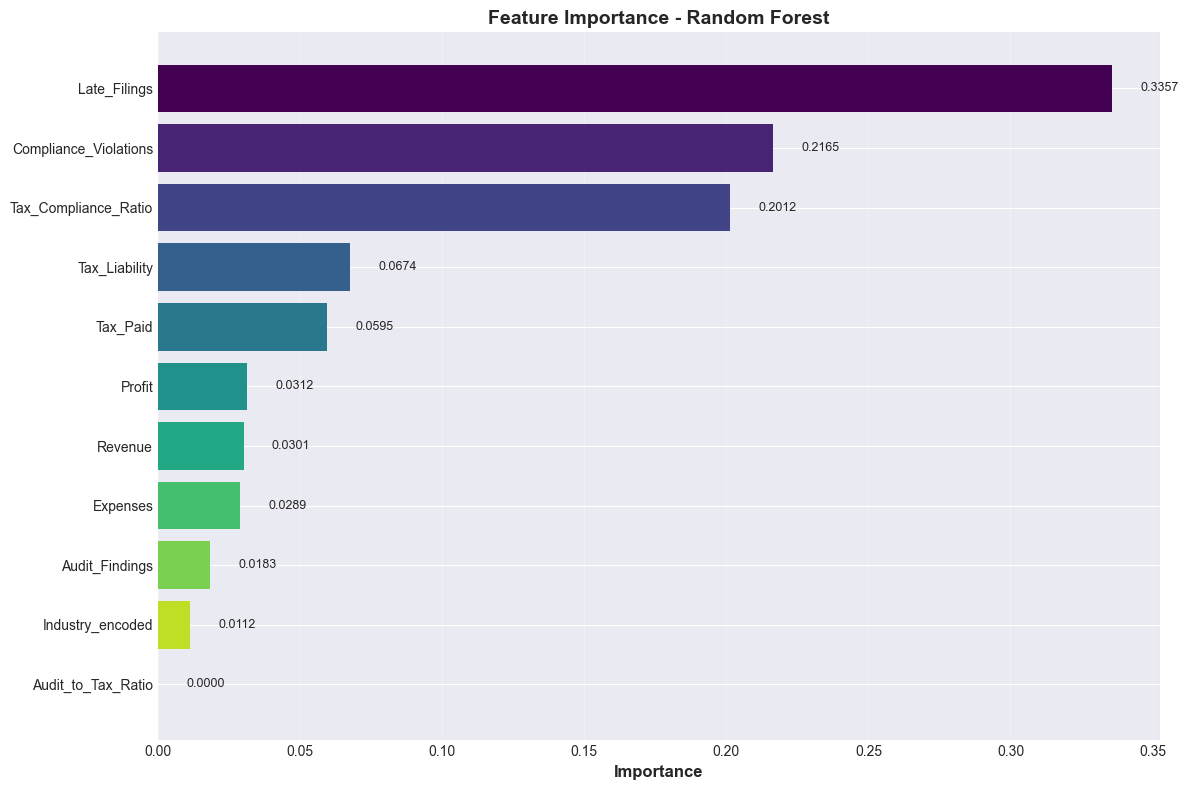

In [48]:
# Extract feature importance from the best Random Forest model
# If best_pipeline exists, extract the classifier
try:
    if 'best_pipeline' in locals():
        rf_model = best_pipeline.named_steps['classifier']
    elif 'best_model' in locals():
        rf_model = best_model.named_steps['classifier']
    else:
        # Create a new model if necessary
        rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                         min_samples_split=10, min_samples_leaf=5,
                                         class_weight='balanced', random_state=42)
        pipeline_temp = Pipeline([('scaler', StandardScaler()), ('classifier', rf_model)])
        pipeline_temp.fit(X_train_new, y_train_new)
        rf_model = pipeline_temp.named_steps['classifier']
except:
    # If variables don't exist, create a new model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                     min_samples_split=10, min_samples_leaf=5,
                                     class_weight='balanced', random_state=42)
    pipeline_temp = Pipeline([('scaler', StandardScaler()), ('classifier', rf_model)])
    pipeline_temp.fit(X_train_new, y_train_new)
    rf_model = pipeline_temp.named_steps['classifier']

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for easier visualization
feature_names = X_train_new.columns if hasattr(X_train_new, 'columns') else [f'Feature_{i}' for i in range(len(feature_importance))]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("="*70)
print("FEATURE IMPORTANCE - RANDOM FOREST")
print("="*70)
print(importance_df.to_string(index=False))

# Feature importance visualization
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = plt.barh(range(len(importance_df)), importance_df['Importance'], color=colors)
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add values on the bars
for i, (idx, row) in enumerate(importance_df.iterrows()):
    plt.text(row['Importance'] + 0.01, i, f"{row['Importance']:.4f}", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 2. Individual Tree Visualization


RANDOM FOREST TREE VISUALIZATION


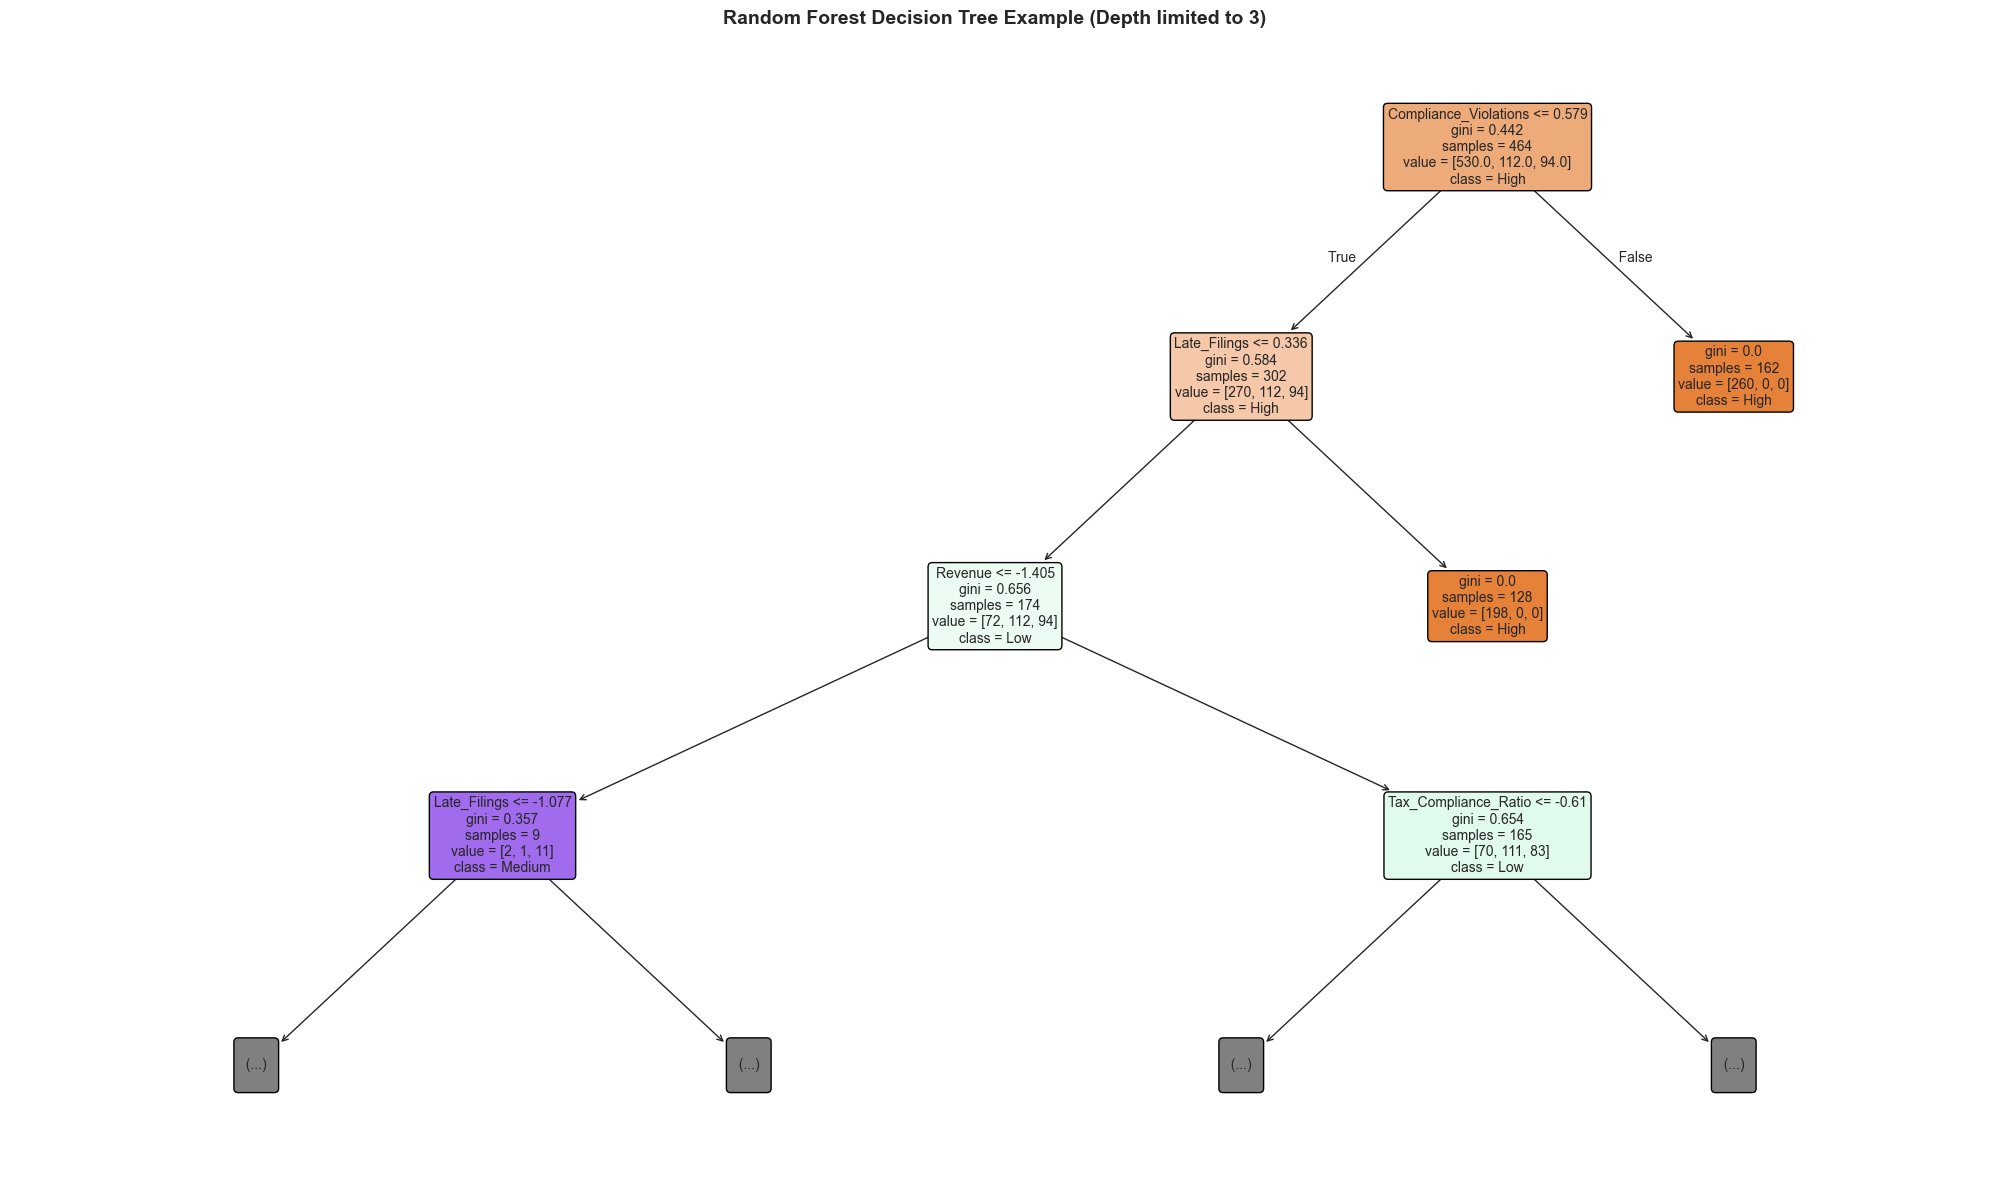


DECISION RULES (Text) - First Tree
|--- Compliance_Violations <= 0.58
|   |--- Late_Filings <= 0.34
|   |   |--- Revenue <= -1.40
|   |   |   |--- truncated branch of depth 3
|   |   |--- Revenue >  -1.40
|   |   |   |--- truncated branch of depth 6
|   |--- Late_Filings >  0.34
|   |   |--- class: 0.0
|--- Compliance_Violations >  0.58
|   |--- class: 0.0



In [49]:
# Visualize an individual tree from the Random Forest
from sklearn.tree import plot_tree, export_text

print("="*70)
print("RANDOM FOREST TREE VISUALIZATION")
print("="*70)

# Select the first tree
tree_to_visualize = rf_model.estimators_[0]

# Graphical tree visualization (limited to depth 3 for readability)
plt.figure(figsize=(20, 12))
plot_tree(tree_to_visualize, 
          feature_names=list(feature_names),
          class_names=['High', 'Low', 'Medium'],
          filled=True,
          rounded=True,
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Random Forest Decision Tree Example (Depth limited to 3)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DECISION RULES (Text) - First Tree")
print("="*70)
# Display decision rules as text (limited to depth 2)
tree_rules = export_text(tree_to_visualize, 
                        feature_names=list(feature_names),
                        max_depth=2)
print(tree_rules)


## 3. Feature Importance Distribution


IMPORTANCE DISTRIBUTION ANALYSIS

Mean importance: 0.0909
Median importance: 0.0312
Max importance: 0.3357
Min importance: 0.0000
Standard deviation: 0.1046

Top 5 most important features:
  Late_Filings: 0.3357 (33.57%)
  Compliance_Violations: 0.2165 (21.65%)
  Tax_Compliance_Ratio: 0.2012 (20.12%)
  Tax_Liability: 0.0674 (6.74%)
  Tax_Paid: 0.0595 (5.95%)


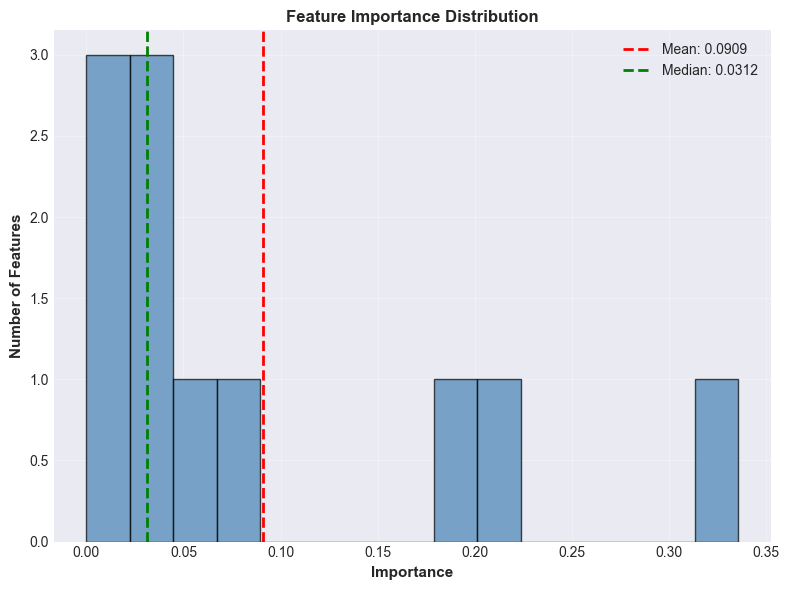

In [51]:
# Analyze the feature importance distribution
print("="*70)
print("IMPORTANCE DISTRIBUTION ANALYSIS")
print("="*70)

# Descriptive statistics
print(f"\nMean importance: {feature_importance.mean():.4f}")
print(f"Median importance: {np.median(feature_importance):.4f}")
print(f"Max importance: {feature_importance.max():.4f}")
print(f"Min importance: {feature_importance.min():.4f}")
print(f"Standard deviation: {feature_importance.std():.4f}")

# Identify the most important features (top 5)
top_features = importance_df.head(5)
print(f"\nTop 5 most important features:")
for idx, row in top_features.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f} ({row['Importance']/feature_importance.sum()*100:.2f}%)")

# Distribution visualization
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Chart: Importance distribution
ax.hist(feature_importance, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
ax.axvline(feature_importance.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {feature_importance.mean():.4f}')
ax.axvline(np.median(feature_importance), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(feature_importance):.4f}')
ax.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Features', fontsize=11, fontweight='bold')
ax.set_title('Feature Importance Distribution', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Tree Depth and Complexity Analysis


TREE DEPTH AND COMPLEXITY ANALYSIS

Analysis of the first 10 trees:
Average depth: 11.90
Min depth: 8
Max depth: 16

Average number of nodes: 92.80
Min number of nodes: 21
Max number of nodes: 147


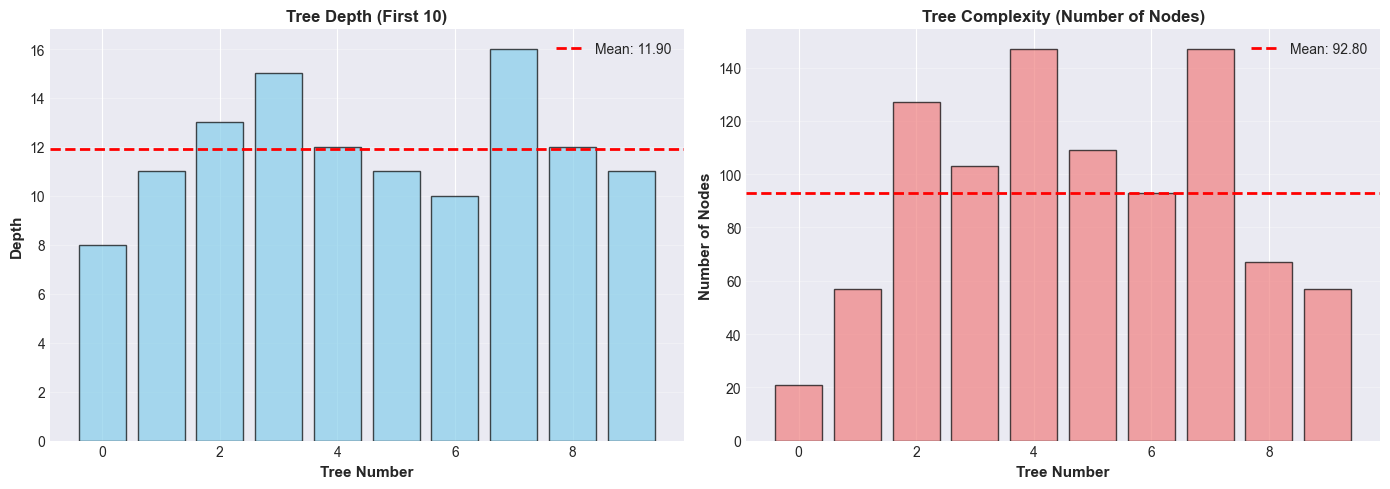

In [52]:
# Analyze tree depth and complexity
from sklearn.tree import _tree

print("="*70)
print("TREE DEPTH AND COMPLEXITY ANALYSIS")
print("="*70)

def get_tree_depth(tree):
    """Calculate the maximum depth of a tree"""
    def get_depth(node, depth=0):
        if tree.children_left[node] == _tree.TREE_LEAF:
            return depth
        return max(get_depth(tree.children_left[node], depth + 1),
                  get_depth(tree.children_right[node], depth + 1))
    return get_depth(0)

def get_tree_nodes(tree):
    """Count the number of nodes in a tree"""
    def count_nodes(node):
        if tree.children_left[node] == _tree.TREE_LEAF:
            return 1
        return 1 + count_nodes(tree.children_left[node]) + count_nodes(tree.children_right[node])
    return count_nodes(0)

# Analyze the first 10 trees
depths = []
node_counts = []

for i, tree in enumerate(rf_model.estimators_[:10]):
    depth = get_tree_depth(tree.tree_)
    nodes = get_tree_nodes(tree.tree_)
    depths.append(depth)
    node_counts.append(nodes)

print(f"\nAnalysis of the first 10 trees:")
print(f"Average depth: {np.mean(depths):.2f}")
print(f"Min depth: {min(depths)}")
print(f"Max depth: {max(depths)}")
print(f"\nAverage number of nodes: {np.mean(node_counts):.2f}")
print(f"Min number of nodes: {min(node_counts)}")
print(f"Max number of nodes: {max(node_counts)}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Depth chart
axes[0].bar(range(len(depths)), depths, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axhline(np.mean(depths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(depths):.2f}')
axes[0].set_xlabel('Tree Number', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Depth', fontsize=11, fontweight='bold')
axes[0].set_title('Tree Depth (First 10)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Node count chart
axes[1].bar(range(len(node_counts)), node_counts, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].axhline(np.mean(node_counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(node_counts):.2f}')
axes[1].set_xlabel('Tree Number', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Number of Nodes', fontsize=11, fontweight='bold')
axes[1].set_title('Tree Complexity (Number of Nodes)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
